<a href="https://colab.research.google.com/github/MadmanMarble/Planet_U-NET/blob/main/AOI_make_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("devtools")

devtools:::install_github("gearslaboratory/gdalUtils")
install.packages("dplyr")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Skipping 1 packages not available: rgdal



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpArAB95/remotes4a76d599a2a/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpArAB95/file4a769b06cf3/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [40]:
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)
# library(gdalUtils)

drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=c043d1dbeb001d358a9b3d89e2660451&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQm9iOGE1cXZwSlNBN001MzlrV0xCN1Q3UGVra1gyai1TbllWX0VqTDI1TG80Z3FieS1icGZFLXJyWmRxbGhLQSIsInN0YXRlIjoiYzA0M2QxZGJlYjAwMWQzNThhOWIzZDg5ZTI2NjA0NTEifQ==


In [ ]:
dir.create("/content/labels")
dir.create("/content/imagery")
dir.create("/content/imagery/planet")
dir.create("/content/imagery/planet/2018")
dir.create("/content/imagery/planet/2019")
dir.create("/content/imagery/planet/2020")
dir.create("/content/workingfolder")
dir.create("/content/workingfolder/aoi")
dir.create("/content/workingfolder/dem")
dir.create("/content/workingfolder/ccap")
dir.create ("/content/workingfolder/nlcd")

## load images and assign variables

In [ ]:
# Load Planet 2018 utm4 select files
# https://drive.google.com/drive/folders/1EX6fe0vObp8VOLcGqxFsxIZhQ9mu0un_?usp=drive_link
#
jp_folder = "1EX6fe0vObp8VOLcGqxFsxIZhQ9mu0un_"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2018/', i_dir$name[1])
      )
    })
  }

# Load Planet 2019 utm4 select files
# https://drive.google.com/drive/folders/1h-OSRbTn3AhbNswTb3jooqRs68QB92T2?usp=drive_link
jp_folder = "1h-OSRbTn3AhbNswTb3jooqRs68QB92T2"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2019/', i_dir$name[1])
      )
    })
  }

# Load Planet 2020 utm4 select files
# https://drive.google.com/drive/folders/1sUlR77kvCtXjXPy7z2nztJzTvhUvXU9w?usp=drive_link
jp_folder = "1sUlR77kvCtXjXPy7z2nztJzTvhUvXU9w"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2020/', i_dir$name[1])
      )
    })
  }



# A dribble: 1 × 3
  name           id                                drive_resource   
  <chr>          <drv_id>                          <list>           
1 input_tif_2018 1EX6fe0vObp8VOLcGqxFsxIZhQ9mu0un_ <named list [34]>


File downloaded:

• input_tif_2018.vrt <id: 1zalJCUfk6mynHywA9UIL5WXx34sqw7f7>

Saved locally as:

• /content/imagery/planet/2018/input_tif_2018.vrt

File downloaded:

• Copy of haleiwa_2018-01-12.tif <id: 1KFoE4qqW5YqXlAH7GbetG8F9SVEIHvlM>

Saved locally as:

• /content/imagery/planet/2018/Copy of haleiwa_2018-01-12.tif

File downloaded:

• Copy of pearl_harbor_2018-01-14.tif <id: 1IdK0osTcDcIOKHp03sEbuooKhELtkTyy>

Saved locally as:

• /content/imagery/planet/2018/Copy of pearl_harbor_2018-01-14.tif

File downloaded:

• Copy of kawainui_2018-01-26.tif <id: 1d_ZlKw2WU_fRwPhlw3OOF9oJYyp3IcIT>

Saved locally as:

• /content/imagery/planet/2018/Copy of kawainui_2018-01-26.tif

File downloaded:

• Copy of kahuku_2018-02-19.tif <id: 109DHLMjo63vZCA83lXKcaGMQIkulIryV>

Saved locally as:

• /content/imagery/planet/2018/Copy of kahuku_2018-02-19.tif



# A dribble: 1 × 3
  name           id                                drive_resource   
  <chr>          <drv_id>                          <list>           
1 input_tif_2019 1h-OSRbTn3AhbNswTb3jooqRs68QB92T2 <named list [34]>


File downloaded:

• input_tif_2019.vrt <id: 1-Gv-3U2zKj-25BuiNdxehyLMcm8euaJ->

Saved locally as:

• /content/imagery/planet/2019/input_tif_2019.vrt

File downloaded:

• Copy of haleiwa_2019-01-11.tif <id: 1SwjecV8MqQ92UugW6R8Ekgq5v-aX_B1b>

Saved locally as:

• /content/imagery/planet/2019/Copy of haleiwa_2019-01-11.tif

File downloaded:

• Copy of kawainui_2019-01-25.tif <id: 1KT_HFnJ9ti8XzjFfsmWqNLeSKiYVmnyf>

Saved locally as:

• /content/imagery/planet/2019/Copy of kawainui_2019-01-25.tif

File downloaded:

• Copy of kahuku_2019-03-15.tif <id: 1yGnJKDpowOUax40hzXna4lI-UWfvm7dg>

Saved locally as:

• /content/imagery/planet/2019/Copy of kahuku_2019-03-15.tif

File downloaded:

• Copy of pearl_harbor_2019-02-20.tif <id: 1hqq3vgk-82b8FyykImXcUek7UekZFUtc>

Saved locally as:

• /content/imagery/planet/2019/Copy of pearl_harbor_2019-02-20.tif



# A dribble: 1 × 3
  name           id                                drive_resource   
  <chr>          <drv_id>                          <list>           
1 input_tif_2020 1sUlR77kvCtXjXPy7z2nztJzTvhUvXU9w <named list [34]>


File downloaded:

• input_tif_2020.vrt <id: 1-K-OhIGho715J3G8Uq0qw5QGbvRi0yVk>

Saved locally as:

• /content/imagery/planet/2020/input_tif_2020.vrt

File downloaded:

• Copy of haleiwa_2020-01-21.tif <id: 1MCki_ckMFWBpZgCmdQSAxG93psgfCVXA>

Saved locally as:

• /content/imagery/planet/2020/Copy of haleiwa_2020-01-21.tif

File downloaded:

• Copy of pearl_harbor_2020-01-23.tif <id: 1KQS4OXXMlLJgJNDDbtlY-7cQvnk2oa_->

Saved locally as:

• /content/imagery/planet/2020/Copy of pearl_harbor_2020-01-23.tif

File downloaded:

• Copy of kawainui_2020-01-24.tif <id: 1qsw-SWt4xf134RxICkXRGff_7nxdsIlH>

Saved locally as:

• /content/imagery/planet/2020/Copy of kawainui_2020-01-24.tif

File downloaded:

• Copy of kahuku_2020-01-22.tif <id: 1d5Tj68fIFh4RSCDwL3ilnTunF0HHE_qR>

Saved locally as:

• /content/imagery/planet/2020/Copy of kahuku_2020-01-22.tif



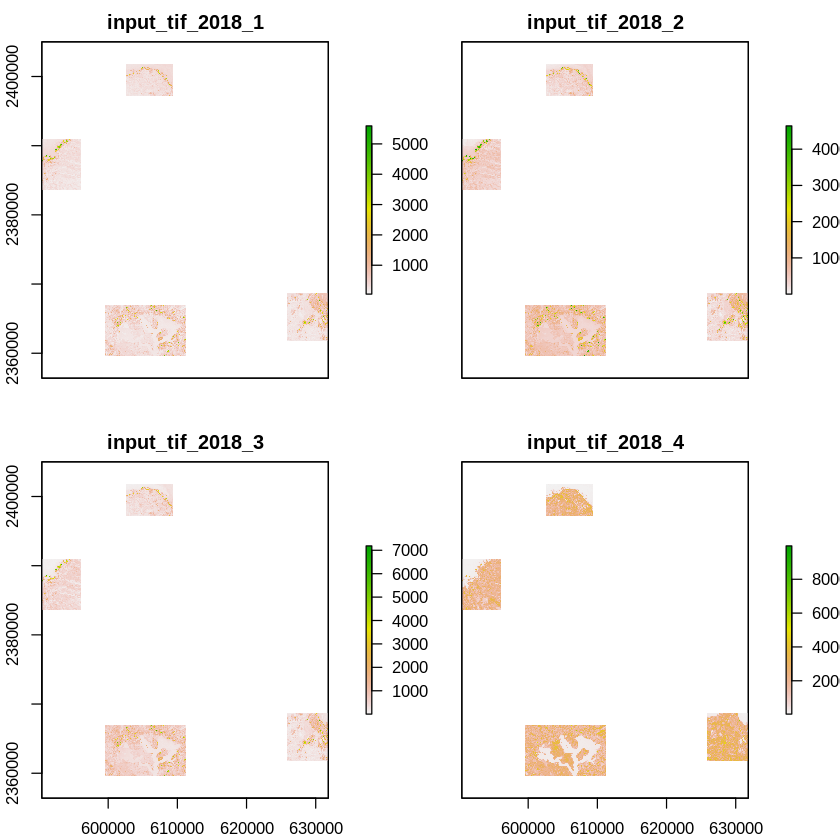

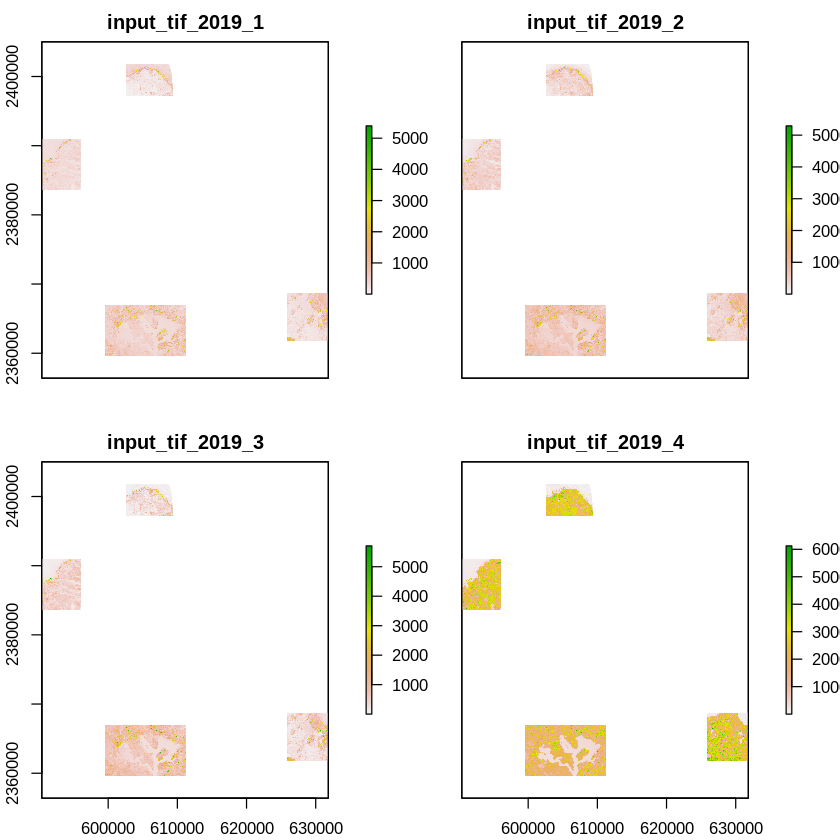

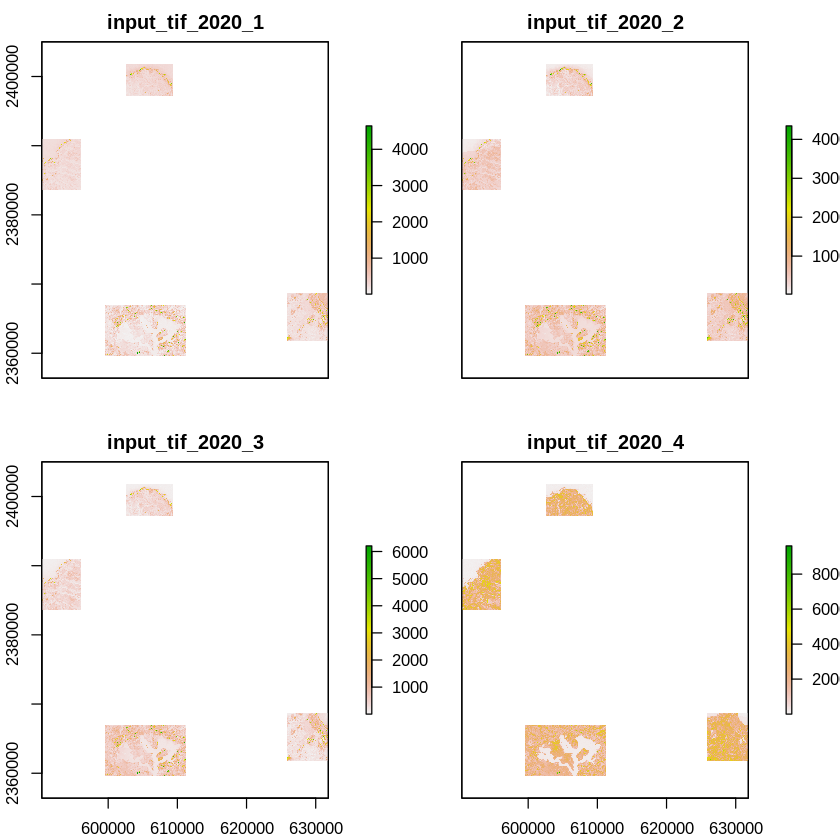

In [ ]:
vrt_utm4_2018 <- stack("/content/imagery/planet/2018/input_tif_2018.vrt")
vrt_utm4_2018 %>% plot
vrt_utm4_2019 <- stack("/content/imagery/planet/2019/input_tif_2019.vrt")
vrt_utm4_2019 %>% plot
vrt_utm4_2020 <- stack("/content/imagery/planet/2020/input_tif_2020.vrt")
vrt_utm4_2020 %>% plot

## load working folder and assign variables

In [ ]:
# https://drive.google.com/drive/folders/1SJtFMy9oe2D8dFrWoMgRmLXL2N6oNvej?usp=drive_link
jp_folder = "1SJtFMy9oe2D8dFrWoMgRmLXL2N6oNvej"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/aoi/', i_dir$name[1])
      )
    })
  }


# A dribble: 1 × 3
  name       id                                drive_resource   
  <chr>      <drv_id>                          <list>           
1 input_gpkg 1SJtFMy9oe2D8dFrWoMgRmLXL2N6oNvej <named list [34]>


File downloaded:

• aoi_oahu_wetlands.gpkg <id: 1BAFtxrM9LKZ_XNwDC624BsouJCBIf6IE>

Saved locally as:

• /content/workingfolder/aoi/aoi_oahu_wetlands.gpkg



Error in get_export_mime_type(mime_type) : 
  Not a recognized Google MIME type:
✖ application/vnd.google-apps.folder


File downloaded:

• aoi_extent_384.gpkg <id: 1mZ6-cu2Cucd-k4llJdJuWMJ0n9C7JMcJ>

Saved locally as:

• /content/workingfolder/aoi/aoi_extent_384.gpkg

File downloaded:

• Haleiwa.gpkg <id: 1ctjh-m8FoU60jLEcFbSIZ4gnpMnVU0Xx>

Saved locally as:

• /content/workingfolder/aoi/Haleiwa.gpkg

File downloaded:

• oahu_aoi_outline.gpkg <id: 1z0yWRYrOjbVnugtcdnBTzw7Te8-6RY0X>

Saved locally as:

• /content/workingfolder/aoi/oahu_aoi_outline.gpkg

File downloaded:

• PearlHarbor.gpkg <id: 111911t8Q8T1PvxVas2265b-PZUEaKre3>

Saved locally as:

• /content/workingfolder/aoi/PearlHarbor.gpkg

File downloaded:

• Kahuku.gpkg <id: 1WqovgDsTe4QaOPULWe-rhB3gZgh3AQ6j>

Saved locally as:

• /content/workingfolder/aoi/Kahuku.gpkg

File downloaded:

• KawainuiMarsh.gpkg <id: 15eXrZy1hiCDS-0BhjdiTzKoN-bp_NIz2>

Saved locally as:

• /content/workingfolder/aoi/KawainuiMarsh.gpkg



Reading layer `haleiwa_manual_edits__cleaned' from data source 
  `/content/workingfolder/aoi/Haleiwa.gpkg' using driver `GPKG'
Simple feature collection with 199 features and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 590316.5 ymin: 2385106 xmax: 596060.8 ymax: 2390928
Projected CRS: WGS 84 / UTM zone 4N
Reading layer `haleiwa_manual_edits__cleaned' from data source 
  `/content/workingfolder/aoi/Haleiwa.gpkg' using driver `GPKG'
Simple feature collection with 199 features and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 590316.5 ymin: 2385106 xmax: 596060.8 ymax: 2390928
Projected CRS: WGS 84 / UTM zone 4N


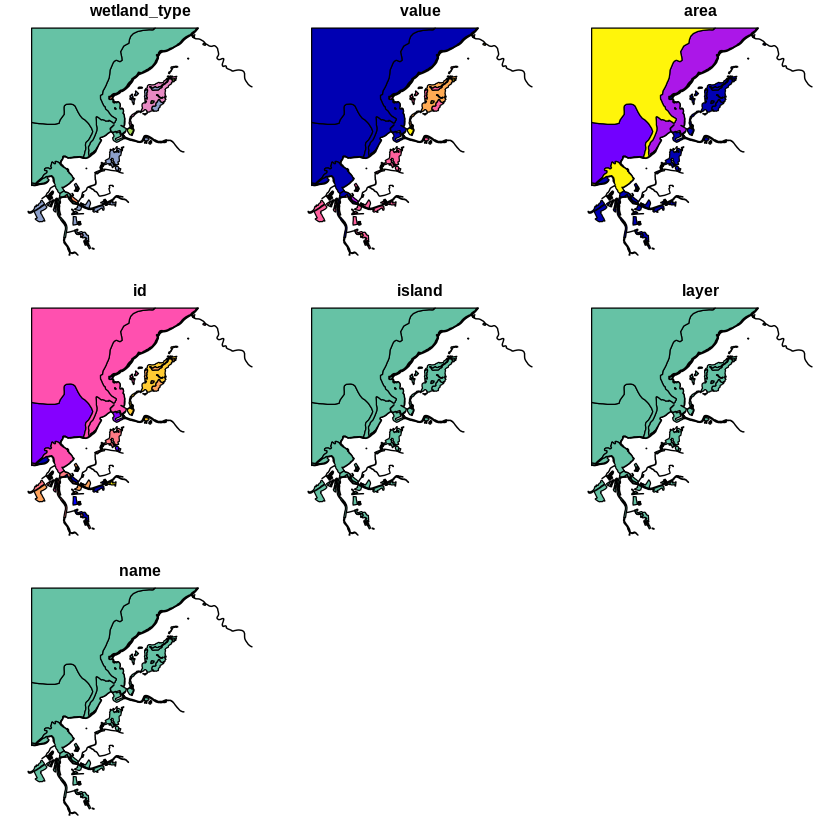

In [ ]:
Haleiwa <- st_read("/content/workingfolder/aoi/Haleiwa.gpkg")
Haleiwa %>% plot
nc <- st_read("/content/workingfolder/aoi/Haleiwa.gpkg")
nc %>% plot

Reading layer `kahuku_manual_edits' from data source 
  `/content/workingfolder/aoi/Kahuku.gpkg' using driver `GPKG'
Simple feature collection with 409 features and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 602662.2 ymin: 2397493 xmax: 609352.4 ymax: 2401851
Projected CRS: WGS 84 / UTM zone 4N


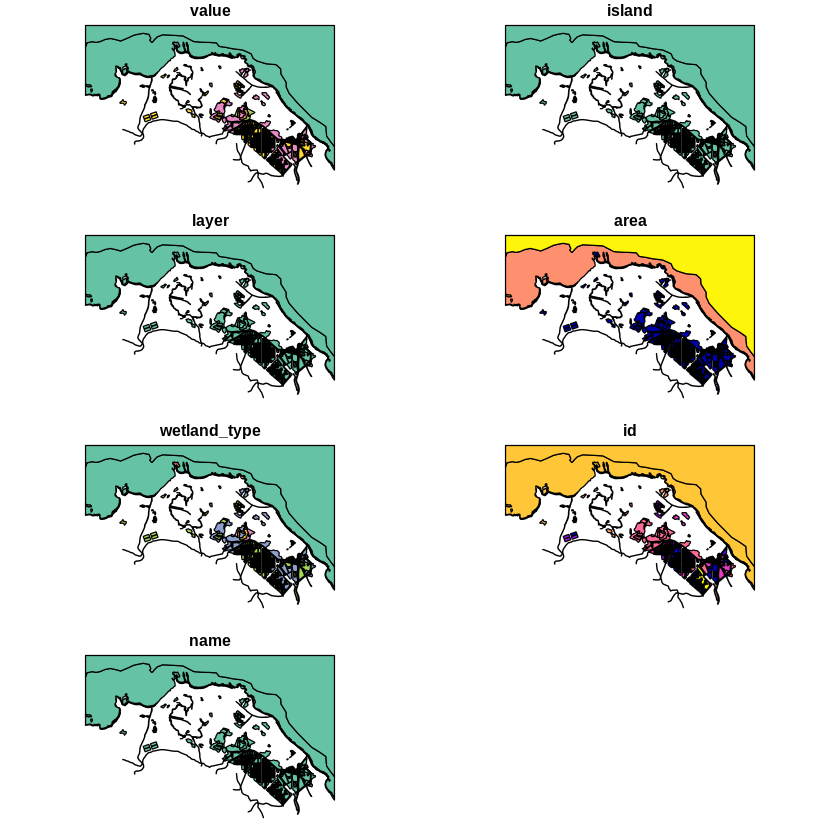

In [ ]:
Kahuku <- st_read("/content/workingfolder/aoi/Kahuku.gpkg")
Kahuku %>% plot

Reading layer `4924edits__edits' from data source 
  `/content/workingfolder/aoi/KawainuiMarsh.gpkg' using driver `GPKG'
Simple feature collection with 141 features and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 625834.2 ymin: 2361748 xmax: 632113 ymax: 2368736
Projected CRS: NAD83 / UTM zone 4N


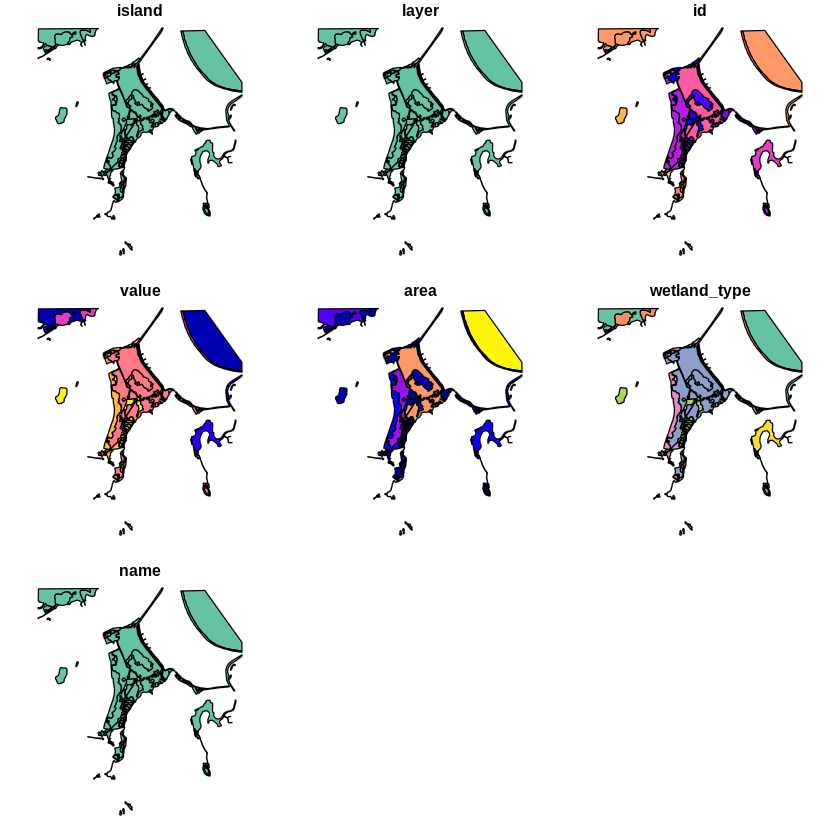

In [ ]:
KawainuiMarsh <- st_read("/content/workingfolder/aoi/KawainuiMarsh.gpkg")
KawainuiMarsh %>% plot

Reading layer `editing_wetland_ph_001' from data source 
  `/content/workingfolder/aoi/PearlHarbor.gpkg' using driver `GPKG'
Simple feature collection with 153 features and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 600458.5 ymin: 2361475 xmax: 606351.9 ymax: 2366083
Projected CRS: WGS 84 / UTM zone 4N


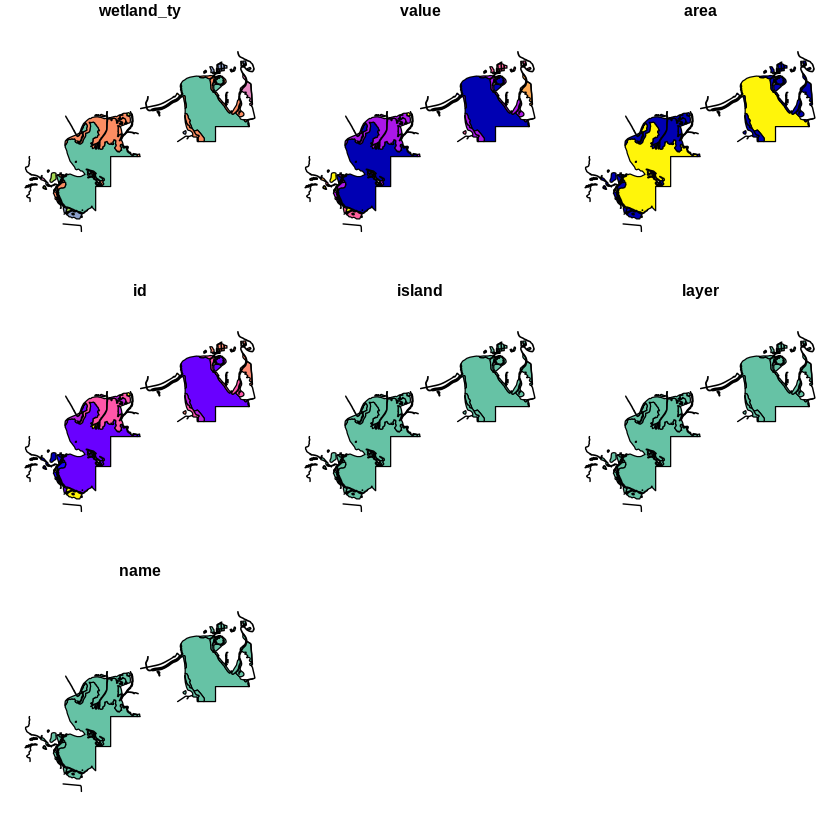

In [ ]:
PearlHarbor <- st_read("/content/workingfolder/aoi/PearlHarbor.gpkg")
PearlHarbor %>% plot

Reading layer `aoi_oahu__aoi_wetland_4' from data source 
  `/content/workingfolder/aoi/oahu_aoi_outline.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 590409.2 ymin: 2361400 xmax: 631823.2 ymax: 2401851
Projected CRS: WGS 84 / UTM zone 4N


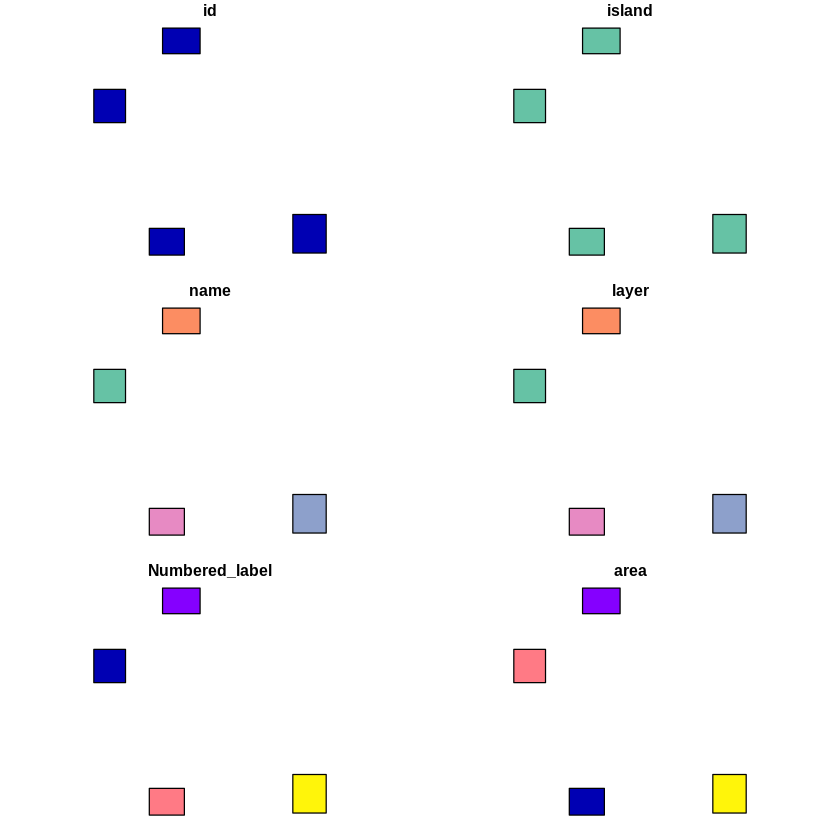

In [ ]:
oahu_aoi_outline <- st_read("/content/workingfolder/aoi/oahu_aoi_outline.gpkg")
oahu_aoi_outline %>% plot

Reading layer `aoi_oahu_wetlands' from data source 
  `/content/workingfolder/aoi/aoi_oahu_wetlands.gpkg' using driver `GPKG'
Simple feature collection with 902 features and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 590316.5 ymin: 2361475 xmax: 632113 ymax: 2401851
Projected CRS: WGS 84 / UTM zone 4N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

wetland_ty,value,area,id,island,layer,name,geom
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<MULTIPOLYGON [m]>
Estuarine and Marine Deepwater,1,2337,1,Oʻahu,PearlHarbor,Pearl Harbor National Wildlife Refuge,MULTIPOLYGON (((601338.6 23...
Estuarine and Marine Deepwater,1,376,2,Oʻahu,PearlHarbor,Pearl Harbor National Wildlife Refuge,MULTIPOLYGON (((601275.1 23...
Estuarine and Marine Deepwater,1,865,3,Oʻahu,PearlHarbor,Pearl Harbor National Wildlife Refuge,MULTIPOLYGON (((601233.2 23...
Estuarine and Marine Deepwater,1,3846,4,Oʻahu,PearlHarbor,Pearl Harbor National Wildlife Refuge,MULTIPOLYGON (((601315 2362...
Estuarine and Marine Wetland,4,2856,5,Oʻahu,PearlHarbor,Pearl Harbor National Wildlife Refuge,MULTIPOLYGON (((601279.9 23...
Freshwater Emergent Wetland,5,4907,6,Oʻahu,PearlHarbor,Pearl Harbor National Wildlife Refuge,MULTIPOLYGON (((601104.6 23...
Freshwater Emergent Wetland,5,2132,7,Oʻahu,PearlHarbor,Pearl Harbor National Wildlife Refuge,MULTIPOLYGON (((600925.9 23...
Freshwater Emergent Wetland,5,4063,8,Oʻahu,PearlHarbor,Pearl Harbor National Wildlife Refuge,MULTIPOLYGON (((600743.5 23...
Freshwater Emergent Wetland,5,330,9,Oʻahu,PearlHarbor,Pearl Harbor National Wildlife Refuge,MULTIPOLYGON (((600608 2362...


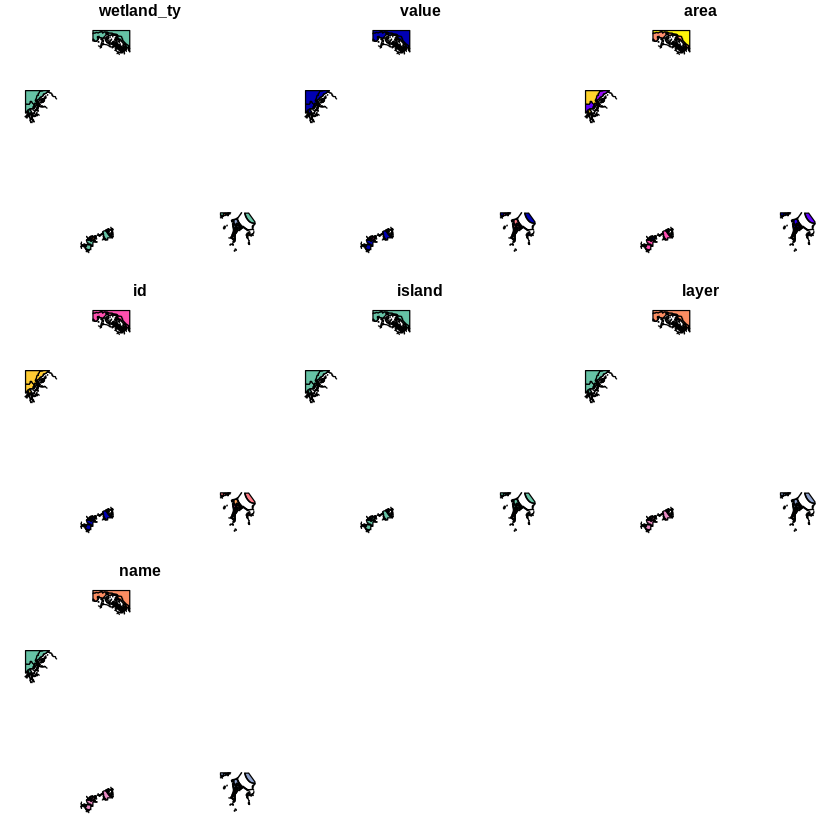

In [ ]:
wetland <- st_read("/content/workingfolder/aoi/aoi_oahu_wetlands.gpkg")
wetland %>% plot
wetland

In [ ]:
# g_wetland = st_make_grid(wetland, cellsize = c(384, 384))
# plot(g_wetland)
# plot(st_geometry(wetland), add = TRUE)
# # g[nc] selects cells that intersect with nc:
# plot(g_wetland[wetland], col = '#ff000088', add = TRUE)
# g_wetland_intersect = st_as_sf(g_wetland[wetland])

In [ ]:
# g_wetland_intersect %>% plot
# st_write(g_wetland_intersect, "/content/sample_data/g_wetland_intersect.gpkg", driver = "GPKG")

In [ ]:
# g_wetland_intersect_384 <-
#   1:nrow (wetland) %>% lapply(function(x){
#     # fishnet <- g_wetland_intersect %>% st_as_sf %>% data.table
#     fishnet <- st_make_grid(wetland, cellsize = c(384, 384)) %>% st_as_sf %>% data.table
#     fishnet$id <- 1:length(fishnet)
#     fishnet_int <- fishnet %>%
#       st_as_sf() %>%
#       st_intersection(wetland[x,]) %>%
#       st_transform(st_crs(26904)) %>%
#       data.table()

#     fishnet$island <- wetland$island[x]
#     fishnet$layer <- wetland$layer[x]

#     return(fishnet)

#     print(fishnet)



#   }) %>% rbindlist()


## code for individual aoi stuff

In [ ]:
# g1 = st_make_grid(Haleiwa, cellsize = c(384, 384))
# plot(g1)
# plot(st_geometry(Haleiwa), add = TRUE)
# # g[nc] selects cells that intersect with nc:
# plot(g1[Haleiwa], col = '#ff000088', add = TRUE)
# g1_intersect = st_as_sf(g1[Haleiwa])

In [ ]:
# g2 = st_make_grid(Kahuku, cellsize = c(384, 384))
# plot(g2)
# plot(st_geometry(Kahuku), add = TRUE)
# # g[nc] selects cells that intersect with nc:
# plot(g2[Kahuku], col = '#ff000088', add = TRUE)
# g2_intersect = st_as_sf(g2[Kahuku])

In [ ]:
# g3 = st_make_grid(KawainuiMarsh, cellsize = c(384, 384))
# plot(g3)
# plot(st_geometry(KawainuiMarsh), add = TRUE)
# # g[nc] selects cells that intersect with nc:
# plot(g3[KawainuiMarsh], col = '#ff000088', add = TRUE)
# g3_intersect = st_as_sf(g3[KawainuiMarsh])

In [ ]:
# g4 = st_make_grid(PearlHarbor, cellsize = c(384, 384))
# plot(g4)
# plot(st_geometry(PearlHarbor), add = TRUE)
# # g[nc] selects cells that intersect with nc:
# plot(g4[PearlHarbor], col = '#ff000088', add = TRUE)
# g4_intersect = st_as_sf(g4[PearlHarbor])

In [ ]:
# # Save the intersecting grid as a .gpkg file
# st_write(g_intersect, "/content/sample_data/intersecting_grid.gpkg", driver = "GPKG")

In [ ]:
# g1_intersect %>% st_as_sf %>% data.table
# g2_intersect %>% st_as_sf %>% data.table
# g3_intersect %>% st_as_sf %>% data.table
# g4_intersect %>% st_as_sf %>% data.table

In [ ]:
# g1_intersect$layer <- Haleiwa$layer[1]
# g2_intersect$layer <- Kahuku$layer[1]
# g3_intersect$layer <- KawainuiMarsh$layer[1]
# g4_intersect$layer <- PearlHarbor$layer[1]

In [ ]:
# g1_intersect$island <- Haleiwa$island[1]
# g2_intersect$island <- Kahuku$island[1]
# g3_intersect$island <- KawainuiMarsh$island[1]
# g4_intersect$island <- PearlHarbor$island[1]

## import other data

In [ ]:
# vrt_utm4_2018

File downloaded:

• nlcd_2001_utm4.tif <id: 1KVtVRzV8j3cIhedykbEoBtHrwuB-RqwD>

Saved locally as:

• /content/workingfolder/nlcd/nlcd_wgs84.tif



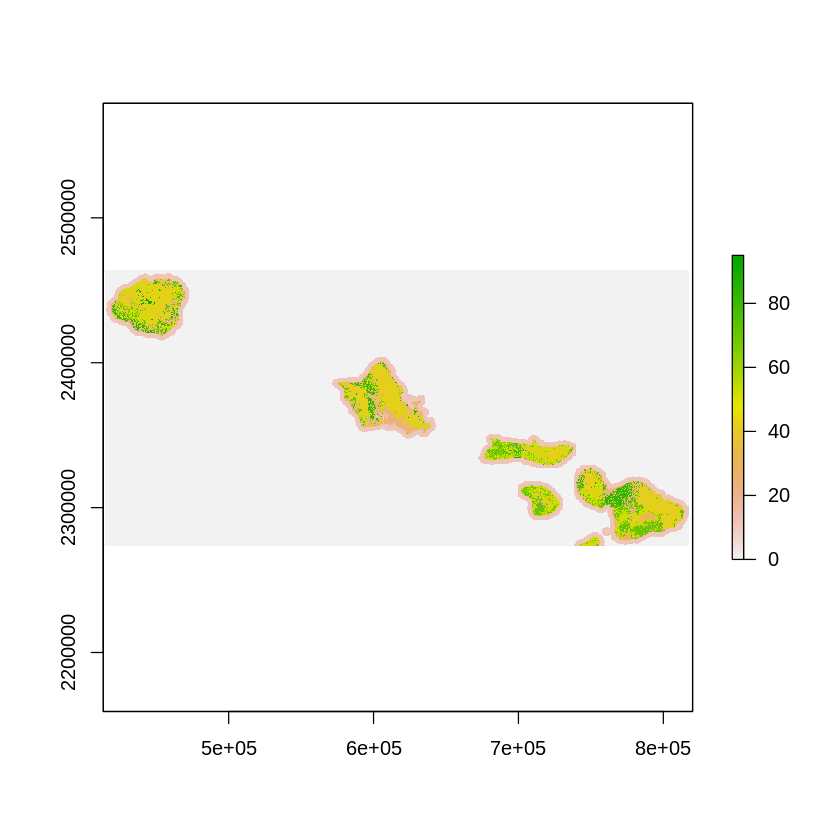

In [ ]:
# # https://drive.google.com/file/d/17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC/view?usp=drive_link
# drive_download(file = as_id('17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC'), path =  '/content/workingfolder/nlcd/nlcd.tif', overwrite = TRUE)
# nlcd <- raster("/content/workingfolder/nlcd/nlcd.tif")
# nlcd %>% plot

# https://drive.google.com/file/d/1KVtVRzV8j3cIhedykbEoBtHrwuB-RqwD/view?usp=drive_link
drive_download(file = as_id('1KVtVRzV8j3cIhedykbEoBtHrwuB-RqwD'), path =  '/content/workingfolder/nlcd/nlcd_wgs84.tif', overwrite = TRUE)
nlcd_wgs84 <- raster("/content/workingfolder/nlcd/nlcd_wgs84.tif")
nlcd_wgs84 %>% plot

In [ ]:
# nlcd %>% st_crs # +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs
nlcd_wgs84 %>% st_crs # +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs

File downloaded:

• oahu_ccap_2010.tif <id: 17hR_LxaRDpXVU8p8P5Mwo2E1nN0CcIUj>

Saved locally as:

• /content/workingfolder/ccap/ccap.tif



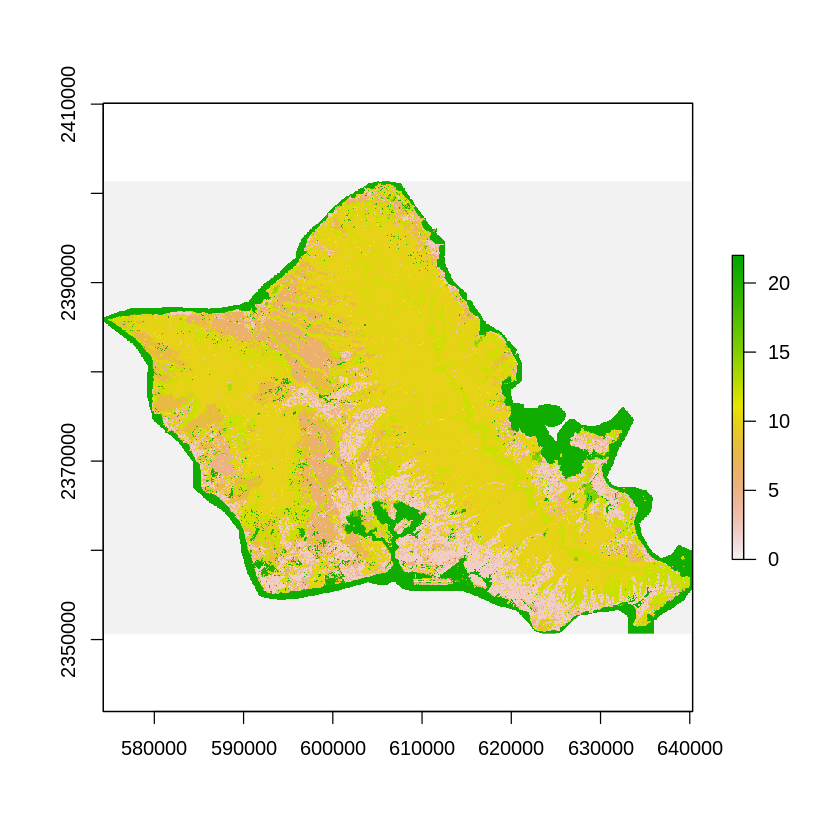

In [ ]:
# https://drive.google.com/file/d/17hR_LxaRDpXVU8p8P5Mwo2E1nN0CcIUj/view?usp=drive_link
drive_download(file = as_id('17hR_LxaRDpXVU8p8P5Mwo2E1nN0CcIUj'), path =  '/content/workingfolder/ccap/ccap.tif', overwrite = TRUE)
ccap <- raster("/content/workingfolder/ccap/ccap.tif")
ccap %>% plot

In [ ]:
ccap %>% st_crs # +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs

File downloaded:

• wgs84_oahu_dem.tif <id: 1vaLfU3XbwPf3LxLuTwzKCD29x3WLsyNY>

Saved locally as:

• /content/workingfolder/dem/dem.tif



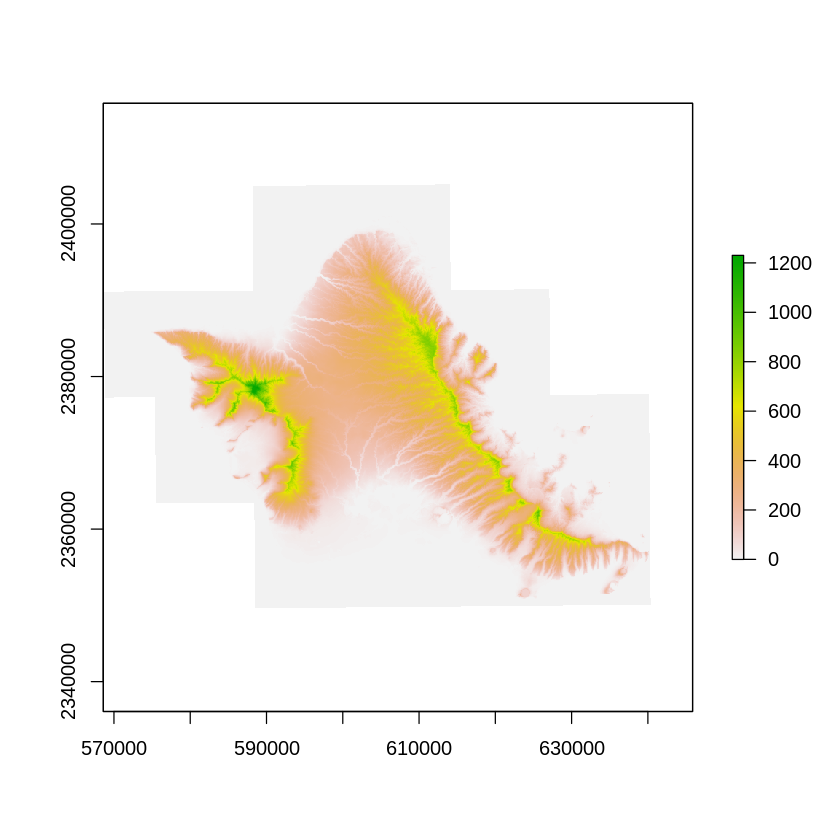

In [ ]:
# https://drive.google.com/file/d/1vaLfU3XbwPf3LxLuTwzKCD29x3WLsyNY/view?usp=drive_link
drive_download(file = as_id('1vaLfU3XbwPf3LxLuTwzKCD29x3WLsyNY'), path =  '/content/workingfolder/dem/dem.tif', overwrite = TRUE)
dem <- raster("/content/workingfolder/dem/dem.tif")
dem %>% plot

In [ ]:
dem %>% st_crs # +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs

## create unified table

In [ ]:
unified_data_table <- data.table (unified =
  c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

nwi_data_table <- data.table (manual_edits =
  list(-1, c(1, 2), 3, 4, 5, 6, 7, -1, -1, -1, -1))

nlcd_data_table <- data.table(nlcd =
  list(-1, 11, -1, 31, 90, 95, -1, c(21,52), c(71,81,82), c(22,23,24), c(41,42,43)))

ccap_labels_data_table <- data.table(ccap =
  list(c(0,1),c(21),-1, c(16,17,18,19), c(14,15), 13, c(22), c(5,12,20), c(6,7,8), c(2,3,4), c(9,10,11)))


unified_data_table_all <- data.table (
  unified_data_table,
  nwi_data_table,
  nlcd_data_table,
  ccap_labels_data_table)

In [ ]:
ccap_path =c('/content/workingfolder/ccap/ccap.tif')
ccap_path_data_table <- data.table (ccap_path)

island = c('oahu')
island_data_table <- data.table (island)

dem_path =c('/content/workingfolder/dem/dem.tif')
dem_path_data_table <- data.table (dem_path)

linked_dt <- data.table (
  island_data_table,
  ccap_path_data_table,
  dem_path_data_table)

linked_dt$ccap_raster <- linked_dt$ccap_path %>% lapply(stack)
linked_dt$dem_raster <- linked_dt$dem_path %>% lapply(stack)

In [ ]:
linked_dt

island,ccap_path,dem_path,ccap_raster,dem_raster
<chr>,<chr>,<chr>,"<RstrStck[,27513,1]>","<RstrStck[,8298,1]>"
oahu,/content/workingfolder/ccap/ccap.tif,/content/workingfolder/dem/dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>


In [ ]:
extent(wetland)

class      : Extent 
xmin       : 590316.5 
xmax       : 632113 
ymin       : 2361475 
ymax       : 2401851 

In [ ]:
extent(ccap)

class      : Extent 
xmin       : 574283.6 
xmax       : 640314.8 
ymin       : 2350661 
ymax       : 2401370 

In [ ]:
extent(dem)

class      : Extent 
xmin       : 568605.9 
xmax       : 645860.2 
ymin       : 2344523 
ymax       : 2407383 

In [ ]:
extent(nlcd_wgs84)

class      : Extent 
xmin       : 413500.8 
xmax       : 820190.1 
ymin       : 2269763 
ymax       : 2468591 

In [ ]:
# cl <- makeCluster(10)

# library(raster)
# library(sf)
# library(fasterize)
# library(magrittr)
# library(googledrive)
# library(parallel)
# library(data.table)
# library(stringr)
# library(dplyr)


# run <- c(1:9) %>% lapply(function(u){
#   test <- g1_intersect[u, ] %>% crop(vrt_utm4_2018,.)
#   test_extent <- extent(test)
#   test_extent_raster <- raster(nrow=384, ncol=384, ext=test_extent, crs=crs(26904))
# })

In [ ]:
# run <- c(1:2) %>% lapply(function(u){
#   test <- g1_intersect[u, ] %>% crop(vrt_utm4_2018,.)
#   test_extent <- extent(test)
#   test_extent_raster <- raster(nrow=384, ncol=384, ext=test_extent, crs=crs("+init=epsg:26904"))
#   test_extent_raster_size <- crop(resample(test, test_extent_raster, method = "ngb"), extent(test_extent_raster)) # this is planet tiles

#   label_crop <- wetland %>% st_intersection(g1_intersect[u,])






#   return (label_crop)
# })

In [ ]:
# run

In [ ]:
# test_extent

# back to original fishnet to clip data to. need to import all original working folder files. maybe even the planet vrt too. just one of them.

In [43]:
dir.create("/content/workingfolder")
dir.create("/content/workingfolder/aoi")
dir.create("/content/workingfolder/nwi_utm4")
dir.create("/content/workingfolder/ccap/")
dir.create("/content/workingfolder/nlcd/")
dir.create("/content/workingfolder/dem/")
dir.create("/content/workingfolder/planet")
dir.create("/content/workingfolder/planet/2018")

Warning message in dir.create("/content/workingfolder"):
“'/content/workingfolder' already exists”
Warning message in dir.create("/content/workingfolder/nwi_utm4"):
“'/content/workingfolder/nwi_utm4' already exists”
Warning message in dir.create("/content/workingfolder/planet"):
“'/content/workingfolder/planet' already exists”
Warning message in dir.create("/content/workingfolder/planet/2018"):
“'/content/workingfolder/planet/2018' already exists”


In [45]:
drive_download(file = as_id("1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH"),
path = "/content/workingfolder/aoi/aoi_utm4.gpkg", overwrite = FALSE)
aoi_utm4 <- st_read("/content/workingfolder/aoi/aoi_utm4.gpkg")
aoi_utm4

File downloaded:

• aoi_wetland_4.gpkg <id: 1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH>

Saved locally as:

• /content/workingfolder/aoi/aoi_utm4.gpkg



Reading layer `aoi_wetland_4' from data source 
  `/content/workingfolder/aoi/aoi_utm4.gpkg' using driver `GPKG'
Simple feature collection with 16 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 444046 ymin: 2299914 xmax: 766191.9 ymax: 2457336
Projected CRS: WGS 84 / UTM zone 4N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

id,island,name,lumahai,layer,path,geom
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<MULTIPOLYGON [m]>
1,NA,NA,NA,anahola,E:/Data/AOI_Shapefiles/kauai/anahola.shp,MULTIPOLYGON (((467439.4 24...
1,NA,NA,NA,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,MULTIPOLYGON (((590409.2 23...
1,NA,NA,NA,hanalei,E:/Data/AOI_Shapefiles/kauai/hanalei.shp,MULTIPOLYGON (((445906 2451...
1,NA,NA,NA,huleia,E:/Data/AOI_Shapefiles/kauai/huleia.shp,MULTIPOLYGON (((459399.5 24...
1,NA,NA,NA,kahuku,E:/Data/AOI_Shapefiles/oahu/kahuku.shp,MULTIPOLYGON (((602662.2 23...
1,NA,NA,NA,kakahaia,E:/Data/AOI_Shapefiles/molokai/kakahaia.shp,MULTIPOLYGON (((712686.8 23...
1,NA,NA,NA,kaluaapuhi,E:/Data/AOI_Shapefiles/molokai/kaluaapuhi.shp,MULTIPOLYGON (((694186.8 23...
1,NA,NA,NA,kamalo,E:/Data/AOI_Shapefiles/molokai/kamalo.shp,MULTIPOLYGON (((718784.3 23...
1,NA,NA,NA,kanaha,E:/Data/AOI_Shapefiles/maui/kanaha.shp,MULTIPOLYGON (((763679.9 23...


In [46]:
aoi_utm4_dt <-as.data.table(aoi_utm4)
aoi_utm4_dt[,island:= path %>% substr(24,100) %>% gsub('.shp','',.) %>% gsub(layer,'',.) %>% gsub('/','',.),by=1:nrow(aoi_utm4_dt)]
aoi_utm4_dt[,name:= path %>% substr(29,100) %>% gsub('.shp','',.) %>% gsub('/','',.),by=1:nrow(aoi_utm4_dt)]
aoi_utm4_dt[layer =="lumahai", id := 1]
aoi_utm4_dt[, lumahai := NULL]
aoi_utm4_dt[id == "1", id := 1:16]
aoi_utm4 <- aoi_utm4_dt %>% st_as_sf
aoi_utm4

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

id,island,name,layer,path,geom
<dbl>,<chr>,<chr>,<chr>,<chr>,<MULTIPOLYGON [m]>
1,kauai,anahola,anahola,E:/Data/AOI_Shapefiles/kauai/anahola.shp,MULTIPOLYGON (((467439.4 24...
2,oahu,haleiwa,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,MULTIPOLYGON (((590409.2 23...
3,kauai,hanalei,hanalei,E:/Data/AOI_Shapefiles/kauai/hanalei.shp,MULTIPOLYGON (((445906 2451...
4,kauai,huleia,huleia,E:/Data/AOI_Shapefiles/kauai/huleia.shp,MULTIPOLYGON (((459399.5 24...
5,oahu,kahuku,kahuku,E:/Data/AOI_Shapefiles/oahu/kahuku.shp,MULTIPOLYGON (((602662.2 23...
6,molokai,aikakahaia,kakahaia,E:/Data/AOI_Shapefiles/molokai/kakahaia.shp,MULTIPOLYGON (((712686.8 23...
7,molokai,aikaluaapuhi,kaluaapuhi,E:/Data/AOI_Shapefiles/molokai/kaluaapuhi.shp,MULTIPOLYGON (((694186.8 23...
8,molokai,aikamalo,kamalo,E:/Data/AOI_Shapefiles/molokai/kamalo.shp,MULTIPOLYGON (((718784.3 23...
9,maui,kanaha,kanaha,E:/Data/AOI_Shapefiles/maui/kanaha.shp,MULTIPOLYGON (((763679.9 23...


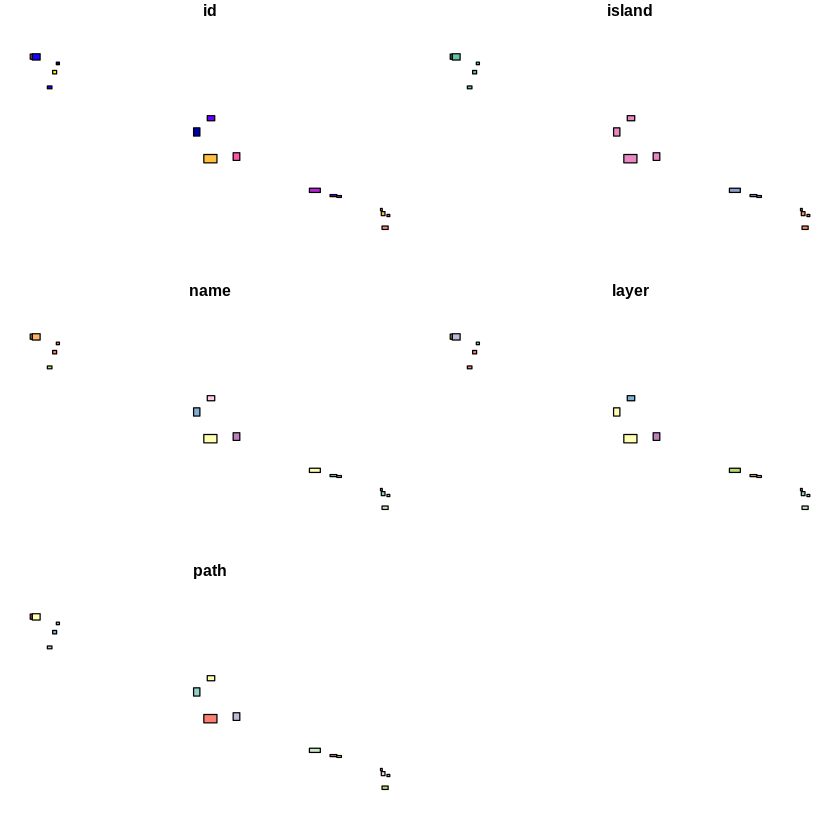

In [47]:
aoi_utm4 %>% plot

In [56]:
jp_folder = "1URF4YPEnWirmyWjmueyIgiYchcORWe6q"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/dem/', i_dir$name[1])
      )
    })
  }

jp_folder = "14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/ccap/', i_dir$name[1])
      )
    })
  }

# A dribble: 1 × 3
  name       id                                drive_resource   
  <chr>      <drv_id>                          <list>           
1 dem_wgs_84 1URF4YPEnWirmyWjmueyIgiYchcORWe6q <named list [34]>
Error in drive_download(as_id(i_dir$id[1]), path = paste0("/content/workingfolder/dem/",  : 
  Local `path` already exists and overwrite is `FALSE`:
• /content/workingfolder/dem/wgs84_hawaii_dem.tif
Error in drive_download(as_id(i_dir$id[1]), path = paste0("/content/workingfolder/dem/",  : 
  Local `path` already exists and overwrite is `FALSE`:
• /content/workingfolder/dem/wgs84_maui_dem.tif
Error in drive_download(as_id(i_dir$id[1]), path = paste0("/content/workingfolder/dem/",  : 
  Local `path` already exists and overwrite is `FALSE`:
• /content/workingfolder/dem/wgs84_molokai_dem.tif
Error in drive_download(as_id(i_dir$id[1]), path = paste0("/content/workingfolder/dem/",  : 
  Local `path` already exists and overwrite is `FALSE`:
• /content/workingfolder/dem/wgs84_oahu_d

File downloaded:

• kauai_ccap_2010.tif <id: 1-9SuvnH-Ck4CMaAXqDQTbbLGKtfMUnxn>

Saved locally as:

• /content/workingfolder/ccap/kauai_ccap_2010.tif

File downloaded:

• oahu_ccap_2010.tif <id: 1-5Q_qbss1zUnW1wcQlomRHehPemzy7HG>

Saved locally as:

• /content/workingfolder/ccap/oahu_ccap_2010.tif

File downloaded:

• molokai_ccap_2010.tif <id: 1-2M0JNgYiVMINDoW2mAiWLX3H9kYz_Z->

Saved locally as:

• /content/workingfolder/ccap/molokai_ccap_2010.tif

File downloaded:

• maui_ccap_2010.tif <id: 1--1nN7Gj_qx6iwPG8Jq5gZcGRA0uaOay>

Saved locally as:

• /content/workingfolder/ccap/maui_ccap_2010.tif



In [50]:
drive_download(file = as_id('17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC'),
path =  '/content/workingfolder/nlcd/nlcd_utm4.tif', overwrite = FALSE)
nlcd_utm4 <- raster("/content/workingfolder/nlcd/nlcd_utm4.tif")
nlcd_utm4

File downloaded:

• nad83_nlcd_hi_2001_split_4.tif <id: 17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC>

Saved locally as:

• /content/workingfolder/nlcd/nlcd_utm4.tif



class      : RasterLayer 
dimensions : 6949, 14128, 98175472  (nrow, ncol, ncell)
resolution : 29.46031, 30.52282  (x, y)
extent     : 412944.2, 829159.5, 2255174, 2467277  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
source     : nlcd_utm4.tif 
names      : nlcd_utm4 


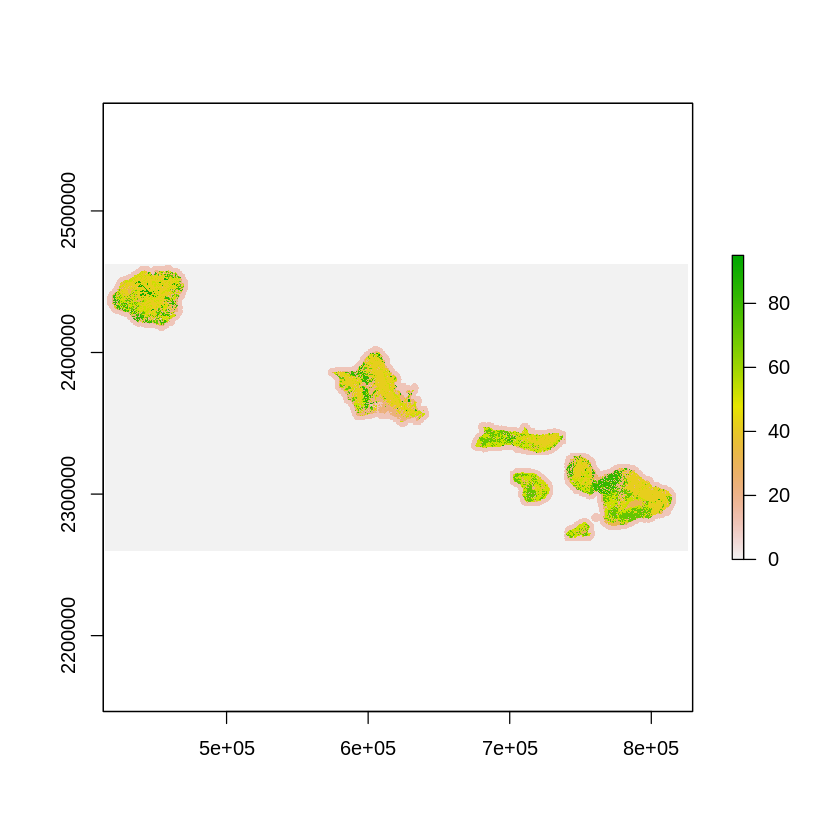

In [51]:
nlcd_utm4 %>% plot

In [52]:
jp_folder = "1MEni7YBYIASkXr7gyu7qX-fdHuqM6N5D"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/planet/2018/', i_dir$name[1])
      )
    })
  }


# A dribble: 1 × 3
  name        id                                drive_resource   
  <chr>       <drv_id>                          <list>           
1 2018_select 1MEni7YBYIASkXr7gyu7qX-fdHuqM6N5D <named list [34]>


File downloaded:

• 2018_vrt_march27_update.vrt <id: 1-1d1KzLapNWKR0bucpO8l8Rofss5mu2F>

Saved locally as:

• /content/workingfolder/planet/2018/2018_vrt_march27_update.vrt

File downloaded:

• 2018_select_vrt.vrt <id: 1-8hNeBq2bxB7C0bGU-9vtZ-3Q54sm0tg>

Saved locally as:

• /content/workingfolder/planet/2018/2018_select_vrt.vrt



Error in get_export_mime_type(mime_type) : 
  Not a recognized Google MIME type:
✖ application/vnd.google-apps.folder


File downloaded:

• anahola_2018-01-12.tif <id: 1-98odkC2H8X3TocnwuagXvLY9Ps1IFla>

Saved locally as:

• /content/workingfolder/planet/2018/anahola_2018-01-12.tif

File downloaded:

• wailua_opaekaa_2018-01-14.tif <id: 10pKgjEdv2vLLy_EL1SDPimGt9li7pamA>

Saved locally as:

• /content/workingfolder/planet/2018/wailua_opaekaa_2018-01-14.tif

File downloaded:

• waihee_2018-01-30.tif <id: 1gZdwLxZBSWP_tbQlTBQTTZ-_MxT7oDZK>

Saved locally as:

• /content/workingfolder/planet/2018/waihee_2018-01-30.tif

File downloaded:

• pearl_harbor_2018-01-14.tif <id: 1VBGaUGl-Q0VsYCGCfMdAieUM1JUja_Pg>

Saved locally as:

• /content/workingfolder/planet/2018/pearl_harbor_2018-01-14.tif

File downloaded:

• paukukalo_2018-01-09.tif <id: 1Yp9XU2fMpY6w_vIjd1vzploJYBETiS4m>

Saved locally as:

• /content/workingfolder/planet/2018/paukukalo_2018-01-09.tif

File downloaded:

• lumahai_2018-01-13.tif <id: 1ODcYvvsiGQJhSgAayrHsVo0jy0bfcyI2>

Saved locally as:

• /content/workingfolder/planet/2018/lumahai_2018-0

File downloaded:

• wetland_mask.gpkg <id: 19-uyHfSnaC5Od95aff9cICbYsVT68gz3>

Saved locally as:

• /content/workingfolder/aoi/aoi_oahu_wetlands.gpkg



Reading layer `wetland_mask' from data source 
  `/content/workingfolder/aoi/aoi_oahu_wetlands.gpkg' using driver `GPKG'
Simple feature collection with 649 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 590673.9 ymin: 2364094 xmax: 632113.6 ymax: 2400804
Projected CRS: NAD83 / UTM zone 4N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

layer,name,class_id,wetland_ty,id,path,geom
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<MULTIPOLYGON [m]>
Haleiwa,Haleiwa,2,emergent wetland,1,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591961.3 23...
Haleiwa,Haleiwa,2,emergent wetland,2,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((592268 2386...
Haleiwa,Haleiwa,2,emergent wetland,3,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((593176.9 23...
Haleiwa,Haleiwa,2,emergent wetland,4,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((594436.1 23...
Haleiwa,Haleiwa,2,emergent wetland,5,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591832.3 23...
Haleiwa,Haleiwa,2,emergent wetland,6,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591794.3 23...
Haleiwa,Haleiwa,2,emergent wetland,7,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591839.9 23...
Haleiwa,Haleiwa,2,emergent wetland,8,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591870.4 23...
Haleiwa,Haleiwa,2,emergent wetland,9,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591787.5 23...


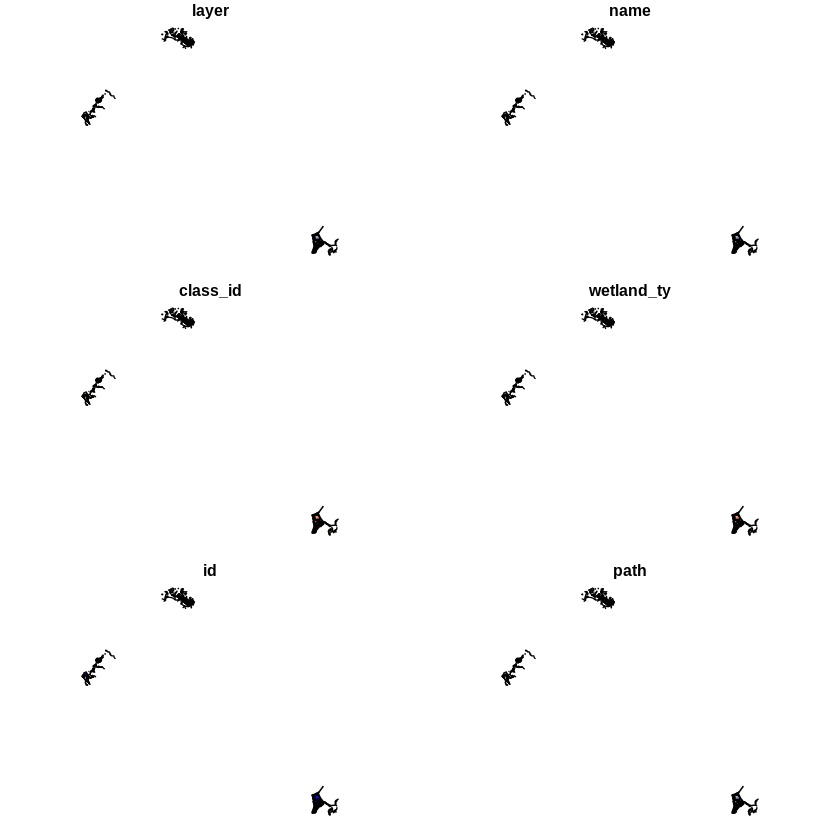

In [53]:
# https://drive.google.com/file/d/19-uyHfSnaC5Od95aff9cICbYsVT68gz3/view?usp=drive_link
drive_download(file = as_id('19-uyHfSnaC5Od95aff9cICbYsVT68gz3'),
path =  '/content/workingfolder/aoi/aoi_oahu_wetlands.gpkg', overwrite = FALSE)
nwi_utm4 <- st_read("/content/workingfolder/aoi/aoi_oahu_wetlands.gpkg")
nwi_utm4 %>% plot
nwi_utm4

In [57]:
ccap_path =c('/content/workingfolder/ccap/kauai_ccap_2010.tif',
'/content/workingfolder/ccap/oahu_ccap_2010.tif',
'/content/workingfolder/ccap/molokai_ccap_2010.tif',
'/content/workingfolder/ccap/maui_ccap_2010.tif')
ccap_path_data_table <- data.table (ccap_path)

island = c('kauai','oahu','molokai','maui')
island_data_table <- data.table (island)

dem_path =c('/content/workingfolder/dem/wgs84_kauai_10m.tif',
'/content/workingfolder/dem/wgs84_oahu_dem.tif',
'/content/workingfolder/dem/wgs84_molokai_dem.tif',
'/content/workingfolder/dem/wgs84_maui_dem.tif')
dem_path_data_table <- data.table (dem_path)

linked_dt <- data.table (
  island_data_table,
  ccap_path_data_table,
  dem_path_data_table)

linked_dt$ccap_raster <- linked_dt$ccap_path %>% lapply(stack)
linked_dt$dem_raster <- linked_dt$dem_path %>% lapply(stack)

In [ ]:
linked_dt

island,ccap_path,dem_path,ccap_raster,dem_raster
<chr>,<chr>,<chr>,<list>,<list>
kauai,/content/workingfolder/ccap/utm4/kauai_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_kauai_10m.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
oahu,/content/workingfolder/ccap/utm4/oahu_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_oahu_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
molokai,/content/workingfolder/ccap/utm4/molokai_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_molokai_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
maui,/content/workingfolder/ccap/utm4/maui_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_maui_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>


In [58]:
planet_fishnet_384 <-
  1:nrow(aoi_utm4) %>% lapply(function(x){
    fishnet <- st_make_grid(aoi_utm4[x,], cellsize = c(384,384)) %>% st_as_sf %>% data.table
    fishnet$id <-1:length(fishnet)
    fishnet_int <- fishnet %>%
      st_as_sf() %>%
        st_intersection(aoi_utm4[x,]) %>%
          st_transform(st_crs(26904)) %>%
            data.table()
    fishnet <- fishnet[fishnet$id %in% fishnet_int$id ]

    fishnet$island <- aoi_utm4$island[x]
    fishnet$layer <- aoi_utm4$layer[x]



    return(fishnet)
    print(fishnet)
    print(class(fishnet))
    print(st_crs(fishnet))
    plot(fishnet)

  }) %>% rbindlist()

planet_fishnet_384_sf <- st_as_sf(planet_fishnet_384)
class(planet_fishnet_384_sf)
st_crs(planet_fishnet_384_sf)

planet_fishnet_384_sf_transformed <- st_transform(planet_fishnet_384_sf, crs = 26904)

st_crs(planet_fishnet_384_sf_transformed)


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant through

[1] "sf"         "data.table" "data.frame"

Coordinate Reference System:
  User input: WGS 84 / UTM zone 4N 
  wkt:
PROJCRS["WGS 84 / UTM zone 4N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT

Coordinate Reference System:
  User input: EPSG:26904 
  wkt:
PROJCRS["NAD83 / UTM zone 4N",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-159,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,

In [59]:
st_write(planet_fishnet_384_sf_transformed, "/content/sample_data/orig_fishnet.gpkg", append=TRUE)

Updating layer `orig_fishnet' to data source `/content/sample_data/orig_fishnet.gpkg' using driver `GPKG'
Writing 2666 features with 3 fields and geometry type Polygon.


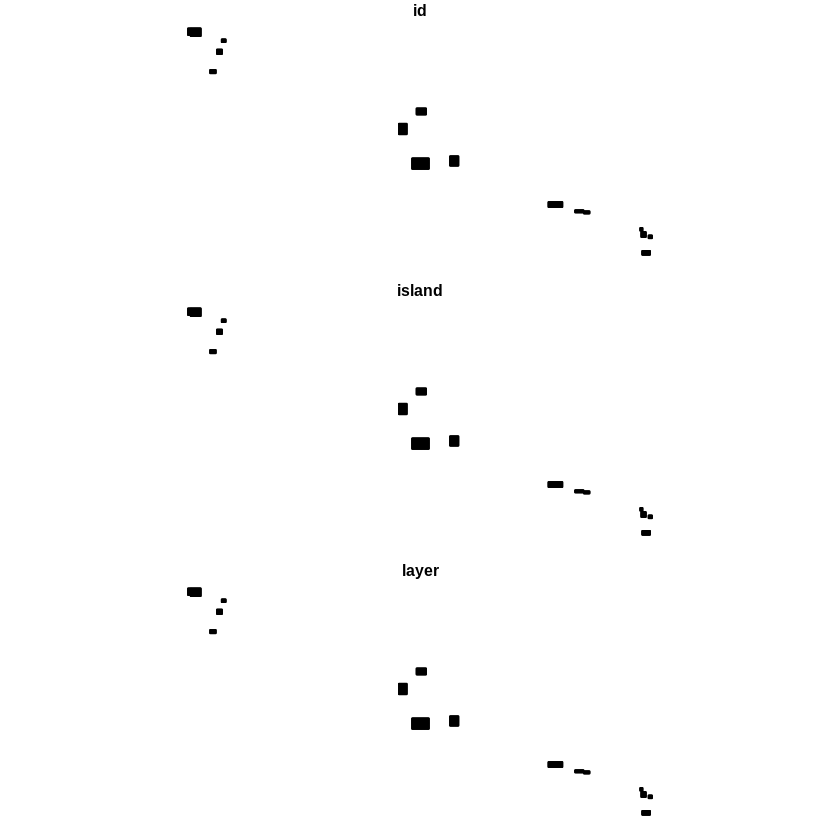

In [63]:
planet_fishnet_384_sf_transformed %>% plot

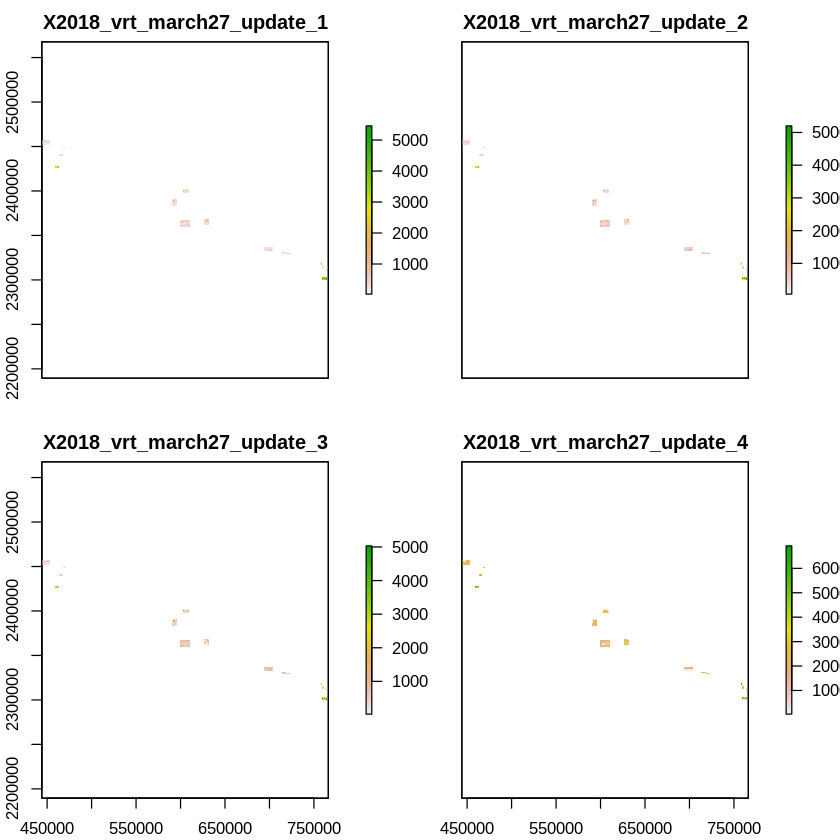

In [64]:
vrt_utm4_2018 <- stack("/content/workingfolder/planet/2018/2018_vrt_march27_update.vrt")
vrt_utm4_2018 %>% plot

In [69]:
c <- raster("/content/workingfolder/ccap/oahu_ccap_2010.tif")

n <- raster("/content/workingfolder/nlcd/nlcd_utm4.tif")

uni_val <- unique(c)
print(uni_val)
uni_valv <- unique(n)


 [1]  0  2  5  6  7  8 10 12 13 14 15 16 17 18 19 20 21 22


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'print': object 'uni_valve' not found


In [70]:
print(uni_valv)


 [1]  0 11 21 22 23 24 31 42 52 71 81 82 90 95


In [76]:
unified_data_table <- data.table (unified =
  c(1, 2, 3, 4, 5, 6, 7))

wetland_data_table <- data.table (wetland =
  list(1, 2, 3, 4, 5, 6, -1))

nlcd_data_table <- data.table(nlcd =
  list(-1, -1, -1, -1, -1, -1, c(0, 11, 21, 22, 23, 24, 31, 42, 52, 71, 81, 82, 90, 95)))

ccap_labels_data_table <- data.table(ccap =
  list(-1, -1, -1, -1, -1, -1, c(0,  2,  5,  6,  7,  8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22)))


unified_data_table_all <- data.table (
  unified_data_table,
  wetland_data_table,
  nlcd_data_table,
  ccap_labels_data_table)

In [77]:
unified_data_table_all

unified,wetland,nlcd,ccap
<dbl>,<list>,<list>,<list>
1,1,-1,-1
2,2,-1,-1
3,3,-1,-1
4,4,-1,-1
5,5,-1,-1
6,6,-1,-1
7,-1,"0, 11, 21, 22, 23, 24, 31, 42, 52, 71, 81, 82, 90, 95","0, 2, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22"


In [82]:
# Assuming your sf object is named nwi_utm4
nwi_utm4_num <- nwi_utm4 %>%
  mutate(class_id = as.numeric(class_id))

# Check the structure to confirm the change
str(nwi_utm4_num)

Classes ‘sf’ and 'data.frame':	649 obs. of  7 variables:
 $ layer     : chr  "Haleiwa" "Haleiwa" "Haleiwa" "Haleiwa" ...
 $ name      : chr  "Haleiwa" "Haleiwa" "Haleiwa" "Haleiwa" ...
 $ class_id  : num  2 2 2 2 2 2 2 2 2 2 ...
 $ wetland_ty: chr  "emergent wetland" "emergent wetland" "emergent wetland" "emergent wetland" ...
 $ id        : num  1 2 3 4 5 6 7 8 9 10 ...
 $ path      : chr  "E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask" "E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask" "E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask" "E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask" ...
 $ geom      :sfc_MULTIPOLYGON of length 649; first list element: List of 1
  ..$ :List of 1
  .. ..$ : num [1:18, 1:2] 591961 591961 591960 591959 591961 ...
  ..- attr(*, "class")= chr [1:3] "XY" "MULTIPOLYGON" "sfg"
 - attr(*, "sf_column")= chr "geom"

In [83]:
nwi_utm4_num

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,layer,name,class_id,wetland_ty,id,path,geom
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<MULTIPOLYGON [m]>
1,Haleiwa,Haleiwa,2,emergent wetland,1,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591961.3 23...
2,Haleiwa,Haleiwa,2,emergent wetland,2,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((592268 2386...
3,Haleiwa,Haleiwa,2,emergent wetland,3,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((593176.9 23...
4,Haleiwa,Haleiwa,2,emergent wetland,4,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((594436.1 23...
5,Haleiwa,Haleiwa,2,emergent wetland,5,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591832.3 23...
6,Haleiwa,Haleiwa,2,emergent wetland,6,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591794.3 23...
7,Haleiwa,Haleiwa,2,emergent wetland,7,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591839.9 23...
8,Haleiwa,Haleiwa,2,emergent wetland,8,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591870.4 23...
9,Haleiwa,Haleiwa,2,emergent wetland,9,E:/random_forest/384_select/haleiwa_wetland_mask.gpkg|layername=haleiwa_wetland_mask,MULTIPOLYGON (((591787.5 23...


In [96]:
dir.create("/content/exports")
# dir.create("/content/exports/image")
# dir.create("/content/exports/dem")
# dir.create("/content/exports/ccap_filled")
dir.create("/content/exports/wetland_mask")
# dir.create("/content/exports/wetland_mask_nlcd")


Warning message in dir.create("/content/exports"):
“'/content/exports' already exists”


In [98]:

cl <- makeCluster(9)
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)

# linked_dt
# nwi_utm4
# nlcd_utm4
# aoi_utm4
# planet_fishnet_384_sf_transformed
# vrt_utm4_2018
# unified_data_table_all

# haleiwa <- c(110:113, 125:128, 139:144, 154:159, 169:174, 185:190, 200:208, 216:223, 232:237, 247:253, 263:268, 279:284, 294:299, 310:315, 326:330, 341:345) %>% lapply(function(u){
# kahuku <- c(741:745, 758:763, 775:781, 786:787, 792:798, 804:816, 819:832, 837:850, 857:867, 875:884, 897:901) %>% lapply(function(u){
# kahuku <- c(778:781, 786:787, 792:798, 804:816, 819:832, 837:850, 857:867, 875:884, 897:901) %>% lapply(function(u){
# kahuku <- c(843:850, 857:867, 875:884, 897:901) %>% lapply(function(u){
# kawainui <- c( 1370:1371, 1386:1387, 1402:1403, 1416:1419, 1425, 1432:1434,1441, 1448:1450, 1456:1457, 1464:1466, 1472:1474, 1481:1482, 1488:1491, 1497:1499,
# 1504:1507, 1510:1511, 1514:1516, 1520:1521,1525:1528, 1530:1539, 1541:1551, 1555, 1558:1565, 1571, 1574:1580, 1585:1587, 1593:1596, 1600:1601, 1604,
# 1610:1612, 1616:1617, 1620:1623, 1628, 1629, 1631, 1632, 1636:1640, 1644, 1645, 1647, 1648) %>% lapply(function(u){

# pearlhar <- c(2086:2088, 2117:2119, 2146:2150, 2177:2182, 2208:2213, 2241:2246, 2272:2278, 2304:2316, 2340:2347, 2373:2378, 2404:2409, 2438:2440) %>% lapply(function(u){
# placeholder<- c(777)%>% lapply(function(u){




# multi_wl <- c(110:113, 125:128, 139:144, 154:159, 169:174, 185:190, 200:208, 216

multi_wl <- c(220:223, 232:237, 247:253, 263:268, 279:284, 294:299, 310:315, 326:330, 341:345,
741:745, 758:763, 775:776, 778:781, 786:787, 792:798, 804:816, 819:832, 837:841, 843:850, 857:867, 875:884, 897:901,
1370:1371, 1386:1387, 1402:1403, 1416:1419, 1425, 1432:1434,1441, 1448:1450, 1456:1457, 1464:1466, 1472:1474, 1481:1482, 1488:1491, 1497:1499,
1504:1507, 1510:1511, 1514:1516, 1520:1521,1525:1528, 1530:1539, 1541:1551, 1555, 1558:1565, 1571, 1574:1580, 1585:1587, 1593:1596, 1600:1601, 1604,
1610:1612, 1616:1617, 1620:1623, 1628, 1629, 1631, 1632, 1636:1640, 1644, 1645, 1647, 1648,
2086:2088, 2117:2119, 2146:2150, 2177:2182, 2208:2213, 2241:2246, 2272:2278, 2304:2316, 2340:2347, 2373:2378, 2404:2409, 2438:2440
) %>% lapply(function(u){

test <- planet_fishnet_384_sf_transformed[u,] %>% crop(vrt_utm4_2018,.)
test_extent <-extent(test)
test_extent_raster <- raster(nrow=128, ncol=128, ext=test_extent, crs=crs(26904)) # nrow=384, ncol=384 is necessary to ensure the width and height are correct!
test_extent_raster_size <- crop(resample(test, test_extent_raster, method = "ngb"), extent(test_extent_raster)) # this is the planet tiles!
crs(test_extent_raster_size) <- CRS("+init=epsg:26904")


test_nwi_crop <- nwi_utm4_num %>% st_intersection(planet_fishnet_384_sf_transformed[u,] %>% st_transform(st_crs(nwi_utm4_num))) %>%
  st_transform(st_crs(26904)) %>% fasterize(.,test_extent_raster_size[[1]], "class_id") # wetland_ty_numeric value

test_nlcd_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(10) %>% st_transform(st_crs(26904)) %>% crop(nlcd_utm4,.) %>%
  resample(test_extent_raster_size, method = "ngb")

test_dem_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(10) %>% st_transform(st_crs(26904)) %>%
  crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$dem_raster[[1]],.) %>% resample(test_extent_raster_size, method= "ngb")

test_ccap_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(10) %>% st_transform(st_crs(26904)) %>%
  crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$ccap_raster[[1]],.) %>% resample(test_extent_raster_size, method = "ngb")


nwi_harm <- test_nwi_crop
nlcd_harm <- test_nlcd_crop
ccap_harm <- test_ccap_crop

values(nwi_harm) <- -1
values(nlcd_harm) <- -1
values(ccap_harm) <- -1

for(i in 1:nrow(unified_data_table_all)){
 values(nwi_harm)[ values(test_nwi_crop %in% unified_data_table_all$wetland[[i]])] <- unified_data_table_all$unified[[i]]
 values(nlcd_harm)[ values(test_nlcd_crop %in% unified_data_table_all$nlcd[[i]])] <- unified_data_table_all$unified[[i]]
 values(ccap_harm)[ values(test_ccap_crop %in% unified_data_table_all$ccap[[i]])] <- unified_data_table_all$unified[[i]]

}

nwi_nlcd_filled <- nlcd_harm
values(nwi_nlcd_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
values(nwi_nlcd_filled)[values(nwi_nlcd_filled) ==-1] <- 12

nwi_ccap_filled <- ccap_harm
values(nwi_ccap_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
values(nwi_ccap_filled)[values(nwi_ccap_filled) ==-1] <- 12

ccap_filled <- ccap_harm
values(ccap_filled)[values(ccap_harm) !=-1] <- values(ccap_harm)[values(ccap_harm) !=-1]
values(ccap_filled)[values(ccap_filled) ==-1] <- 12


# test_extent_raster_size %>% writeRaster(paste0('/content/exports/image/', u,"_planet",'.tif'),overwrite=T)
# test_dem_crop %>% writeRaster(paste0('/content/exports/dem/', u, "_dem",'.tif'),overwrite=T)
# ccap_filled %>% writeRaster(paste0('/content/exports/ccap_filled/', u, "_ccap_filled",'.tif'),overwrite=T)
# nwi_nlcd_filled %>% writeRaster(paste0('/content/exports/wetland_mask_nlcd/', u, "_wetland_mask",'.tif'),overwrite=T)
nwi_ccap_filled %>% writeRaster(paste0('/content/exports/wetland_mask/', u, "_wetland_mask",'.tif'),overwrite=T)

zip(zipfile = "/content/exports/wetland_mask.zip",
    files = c("/content/exports/wetland_mask"))
# https://drive.google.com/drive/folders/1ORk09naIs1EYeLAj9pTgdW2uRlyMAtT9?usp=drive_link
drive_upload(media = "/content/exports/wetland_mask.zip", path = as_id("1ORk09naIs1EYeLAj9pTgdW2uRlyMAtT9"))



})

stopCluster(cl)

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Local file:

• /content/exports/wetland_mask.zip

Uploaded into Drive file:

• wetland_mask.zip <id: 1Evc0clkc2BmbtUaied7usVznWGHFK8Q8>

With MIME type:

• application/zip

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Local file:

• /content/exports/wetland_mask.zip

Uploaded into Drive file:

• wetland_mask.zip <id: 1FCHKLVirczlfrd4zt54ve9ycIwTZZC1A>

With MIME type:

• application/zip

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Local file:

• /content/exports/wetland_mask.zip

Uploaded into Drive file:

• wetland_mask.zip <id: 1ku5muNYwQE92_xWNF0Dw50OiuZZ8-Wqm>

With MIME type:

• application/zip

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Local file:

• /content/exports/wetland_mask.zip

Uploaded into Drive fil

ERROR: Error in curl::curl_fetch_memory(url, handle = handle): Operation was aborted by an application callback


In [99]:
zip(zipfile = "/content/exports/wetland_mask_zip.zip",
    files = c("/content/exports/wetland_mask"))
# https://drive.google.com/drive/folders/16jOxmEmYa5JFz-OzDyl3DdafNd64WKo0?usp=drive_link
drive_upload(media = "/content/exports/wetland_mask_zip.zip", path = as_id("16jOxmEmYa5JFz-OzDyl3DdafNd64WKo0"))


# zip(zipfile = "/content/exports/nwi_nlcd_filled_pearlharbor.zip",
#     files = c("/content/exports/nwi_nlcd_filled"))
# # https://drive.google.com/drive/folders/1iU_rdrmFV2a88GHtGYHYhTq-tQ6X0Ldi?usp=drive_link
# drive_upload(media = "/content/exports/nwi_nlcd_filled_pearlharbor.zip", path = as_id("1iU_rdrmFV2a88GHtGYHYhTq-tQ6X0Ldi"))

Local file:

• /content/exports/wetland_mask_zip.zip

Uploaded into Drive file:

• wetland_mask_zip.zip <id: 1csG2s0D9H0tb6p7qd7J_VK7D9VAFEjvy>

With MIME type:

• application/zip



In [ ]:
# gg <- st_read("/content/workingfolder/aoi/Haleiwa.gpkg")
# gg

In [ ]:
new_data_table <- data.table (unified =
  c(0, 1))

nwi_data_table <- data.table (manual_edits =
  list(-1, c(1, 2, 3, 4, 5, 6, 7)))

nlcd_data_table <- data.table(nlcd =
  list(c(11, 21, 22, 23, 24, 31, 41, 42, 43, 52, 71, 81, 82, 90, 95), -1))

ccap_labels_data_table <- data.table(ccap =
  list(c(0, 1, 21, 16, 17, 18, 19, 14, 15, 13, 22, 5, 12, 20, 6, 7, 8, 2, 3, 4, 9, 10, 11), -1))


new_data_table_all <- data.table (
  new_data_table,
  nwi_data_table,
  nlcd_data_table,
  ccap_labels_data_table)

In [ ]:
new_data_table_all

unified,manual_edits,nlcd,ccap
<dbl>,<list>,<list>,<list>
0,-1,"11, 21, 22, 23, 24, 31, 41, 42, 43, 52, 71, 81, 82, 90, 95","0, 1, 21, 16, 17, 18, 19, 14, 15, 13, 22, 5, 12, 20, 6, 7, 8, 2, 3, 4, 9, 10, 11"
1,"1, 2, 3, 4, 5, 6, 7",-1,-1


In [ ]:
dir.create("/content/exports_binary_pearlharbor")
# dir.create("/content/exports/image")
# dir.create("/content/exports/dem")
# dir.create("/content/exports/ccap_filled")
# dir.create("/content/exports/nwi_ccap_filled")
# dir.create("/content/exports_binary_kahuku/binary")

In [ ]:
cl <- makeCluster(9)
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)

# linked_dt
# nwi_utm4
# nlcd_utm4
# aoi_utm4
# planet_fishnet_384_sf_transformed
# vrt_utm4_2018
# unified_data_table_all

# haleiwa <- c(110:113, 125:128, 139:144, 154:159, 169:174, 185:190, 200:208, 216:223, 232:237, 247:253, 263:268, 279:284, 294:299, 310:315, 326:330, 341:345) %>% lapply(function(u){
# kahuku <- c(741:745, 758:763, 775:781, 786:787, 792:798, 804:816, 819:832, 837:850, 857:867, 875:884, 897:901) %>% lapply(function(u){
# kahuku <- c(778:781, 786:787, 792:798, 804:816, 819:832, 837:850, 857:867, 875:884, 897:901) %>% lapply(function(u){
# kahuku <- c(843:850, 857:867, 875:884, 897:901) %>% lapply(function(u){
# kawainui <- c( 1370:1371, 1386:1387, 1402:1403, 1416:1419, 1425, 1432:1434,1441, 1448:1450, 1456:1457, 1464:1466, 1472:1474, 1481:1482, 1488:1491, 1497:1499,
# 1504:1507, 1510:1511, 1514:1516, 1520:1521,1525:1528, 1530:1539, 1541:1551, 1555, 1558:1565, 1571, 1574:1580, 1585:1587, 1593:1596, 1600:1601, 1604,
# 1610:1612, 1616:1617, 1620:1623, 1628, 1629, 1631, 1632, 1636:1640, 1644, 1645, 1647, 1648) %>% lapply(function(u){
# pearlhar <- c(2086:2088, 2117:2119, 2146:2150, 2177:2182, 2208:2213, 2241:2246, 2272:2278, 2304:2316, 2340:2347, 2373:2378, 2404:2409, 2438:2440) %>% lapply(function(u){

# kahuku <- c(741:745, 758:763, 775:781, 786:787, 792:798, 804:816, 819:832, 837:850, 857:867, 875:884, 897:901) %>% lapply(function(u){
kahuku <- c(778:781, 786:787, 792:798, 804:816, 819:832, 837:841, 843:850, 857:867, 875:884, 897:901) %>% lapply(function(u){

test <- planet_fishnet_384_sf_transformed[u,] %>% crop(vrt_utm4_2018,.)
test_extent <-extent(test)
test_extent_raster <- raster(nrow=384, ncol=384, ext=test_extent, crs=crs(26904)) # nrow=384, ncol=384 is necessary to ensure the width and height are correct!
test_extent_raster_size <- crop(resample(test, test_extent_raster, method = "ngb"), extent(test_extent_raster)) # this is the planet tiles!
crs(test_extent_raster_size) <- CRS("+init=epsg:26904")


test_nwi_crop <- nwi_utm4 %>% st_intersection(planet_fishnet_384_sf_transformed[u,] %>% st_transform(st_crs(nwi_utm4))) %>%
  st_transform(st_crs(26904)) %>% fasterize(.,test_extent_raster_size[[1]], "value") # wetland_ty_numeric

test_nlcd_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>% crop(nlcd_utm4,.) %>%
  resample(test_extent_raster_size, method = "ngb")

# test_dem_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>%
#   crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$dem_raster[[1]],.) %>% resample(test_extent_raster_size, method= "ngb")

# test_ccap_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>%
#   crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$ccap_raster[[1]],.) %>% resample(test_extent_raster_size, method = "ngb")


nwi_harm <- test_nwi_crop
nlcd_harm <- test_nlcd_crop
# ccap_harm <- test_ccap_crop

values(nwi_harm) <- -1
values(nlcd_harm) <- -1
# values(ccap_harm) <- -1

for(i in 1:nrow(new_data_table_all)){
 values(nwi_harm)[ values(test_nwi_crop %in% new_data_table_all$manual_edits[[i]])] <- new_data_table_all$unified[[i]]
 values(nlcd_harm)[ values(test_nlcd_crop %in% new_data_table_all$nlcd[[i]])] <- new_data_table_all$unified[[i]]
#  values(ccap_harm)[ values(test_ccap_crop %in% new_data_table_all$ccap[[i]])] <- new_data_table_all$unified[[i]]

}

nwi_nlcd_filled <- nlcd_harm
values(nwi_nlcd_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
values(nwi_nlcd_filled)[values(nwi_nlcd_filled) ==-1] <- 12

# nwi_ccap_filled <- ccap_harm
# values(nwi_ccap_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_ccap_filled)[values(nwi_ccap_filled) ==-1] <- 12

# ccap_filled <- ccap_harm
# values(ccap_filled)[values(ccap_harm) !=-1] <- values(ccap_harm)[values(ccap_harm) !=-1]
# values(ccap_filled)[values(ccap_filled) ==-1] <- 12




# test_extent_raster_size %>% writeRaster(paste0('/content/exports/image/', u,"_planet",'.tif'),overwrite=T)
# test_dem_crop %>% writeRaster(paste0('/content/exports/dem/', u, "_dem",'.tif'),overwrite=T)
# ccap_filled %>% writeRaster(paste0('/content/exports/ccap_filled/', u, "_ccap_filled",'.tif'),overwrite=T)
nwi_nlcd_filled %>% writeRaster(paste0('/content/exports_binary_kahuku/', u, "_binary",'.tif'),overwrite=T)
# nwi_ccap_filled %>% writeRaster(paste0('/content/exports/nwi_ccap_filled/', u, "_nwi_ccap_filled",'.tif'),overwrite=T)

})

stopCluster(cl)

In [ ]:
# zip(zipfile = "/content/binary_haleiwa.zip",
#     files = c("/content/exports"))
# # https://drive.google.com/drive/folders/1K1WOWkkiT8i99ujBuwyFPhDhCeAzFok_?usp=drive_link
# drive_upload(media = "/content/binary_haleiwa.zip", path = as_id("1K1WOWkkiT8i99ujBuwyFPhDhCeAzFok_"))

# zip(zipfile = "/content/binary_kahuku.zip",
#     files = c("/content/exports_binary_kahuku"))
# # https://drive.google.com/drive/folders/1K1WOWkkiT8i99ujBuwyFPhDhCeAzFok_?usp=drive_link
# drive_upload(media = "/content/binary_kahuku.zip", path = as_id("1K1WOWkkiT8i99ujBuwyFPhDhCeAzFok_"))

# zip(zipfile = "/content/binary_kawainui.zip",
#     files = c("/content/exports_binary_kawainui"))
# # https://drive.google.com/drive/folders/1K1WOWkkiT8i99ujBuwyFPhDhCeAzFok_?usp=drive_link
# drive_upload(media = "/content/binary_kawainui.zip", path = as_id("1K1WOWkkiT8i99ujBuwyFPhDhCeAzFok_"))

zip(zipfile = "/content/binary_pearlharbor.zip",
    files = c("/content/exports_binary_pearlharbor"))
# https://drive.google.com/drive/folders/1K1WOWkkiT8i99ujBuwyFPhDhCeAzFok_?usp=drive_link
drive_upload(media = "/content/binary_pearlharbor.zip", path = as_id("1K1WOWkkiT8i99ujBuwyFPhDhCeAzFok_"))


Local file:

• /content/binary_pearlharbor.zip

Uploaded into Drive file:

• binary_pearlharbor.zip <id: 1aczW-_wZB9UGWbTG4E9tSzJaTPOGX6pY>

With MIME type:

• application/zip



In [ ]:
multi_wl_data_table <- data.table (unified =
  c(0, 1, 2, 3, 4, 5, 6))

nwi_data_table <- data.table (manual_edits =
  list(-1, c(1, 2), 3, 4, 5, 6, 7))

nlcd_data_table <- data.table(nlcd =
  list(c(11, 21, 22, 23, 24, 31, 41, 42, 43, 52, 71, 81, 82, 90, 95), -1, -1, -1, -1, -1, -1))

ccap_labels_data_table <- data.table(ccap =
  list(c(0, 1, 21, 16, 17, 18, 19, 14, 15, 13, 22, 5, 12, 20, 6, 7, 8, 2, 3, 4, 9, 10, 11), -1, -1, -1, -1, -1, -1))


multi_wl_data_table_all <- data.table (
  multi_wl_data_table,
  nwi_data_table,
  nlcd_data_table,
  ccap_labels_data_table)

In [ ]:
multi_wl_data_table_all

unified,manual_edits,nlcd,ccap
<dbl>,<list>,<list>,<list>
0,-1,"11, 21, 22, 23, 24, 31, 41, 42, 43, 52, 71, 81, 82, 90, 95","0, 1, 21, 16, 17, 18, 19, 14, 15, 13, 22, 5, 12, 20, 6, 7, 8, 2, 3, 4, 9, 10, 11"
1,"1, 2",-1,-1
2,3,-1,-1
3,4,-1,-1
4,5,-1,-1
5,6,-1,-1
6,7,-1,-1


In [ ]:
# dir.create("/content/multi_wl_haleiwa")
# dir.create("/content/multi_wl_kahuku")
# dir.create("/content/multi_wl_kawainui")
# dir.create("/content/multi_wl_pearlharbor")
dir.create("/content/multi_wl")

In [ ]:
cl <- makeCluster(9)
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)

# linked_dt
# nwi_utm4
# nlcd_utm4
# aoi_utm4
# planet_fishnet_384_sf_transformed
# vrt_utm4_2018
# unified_data_table_all

# haleiwa <- c(110:113, 125:128, 139:144, 154:159, 169:174, 185:190, 200:208, 216:223, 232:237, 247:253, 263:268, 279:284, 294:299, 310:315, 326:330, 341:345) %>% lapply(function(u){
# kahuku <- c(741:745, 758:763, 775:781, 786:787, 792:798, 804:816, 819:832, 837:850, 857:867, 875:884, 897:901) %>% lapply(function(u){
# kahuku <- c(778:781, 786:787, 792:798, 804:816, 819:832, 837:850, 857:867, 875:884, 897:901) %>% lapply(function(u){
# kahuku <- c(843:850, 857:867, 875:884, 897:901) %>% lapply(function(u){
# kawainui <- c(1370:1371, 1386:1387, 1402:1403, 1416:1419, 1425, 1432:1434,1441, 1448:1450, 1456:1457, 1464:1466, 1472:1474, 1481:1482, 1488:1491, 1497:1499,
# 1504:1507, 1510:1511, 1514:1516, 1520:1521,1525:1528, 1530:1539, 1541:1551, 1555, 1558:1565, 1571, 1574:1580, 1585:1587, 1593:1596, 1600:1601, 1604,
# 1610:1612, 1616:1617, 1620:1623, 1628, 1629, 1631, 1632, 1636:1640, 1644, 1645, 1647, 1648) %>% lapply(function(u){
# pearlhar <- c(2086:2088, 2117:2119, 2146:2150, 2177:2182, 2208:2213, 2241:2246, 2272:2278, 2304:2316, 2340:2347, 2373:2378, 2404:2409, 2438:2440) %>% lapply(function(u){


multi_wl <- c(110:113, 125:128, 139:144, 154:159, 169:174, 185:190, 200:208, 216:223, 232:237, 247:253, 263:268, 279:284, 294:299, 310:315, 326:330, 341:345,
741:745, 758:763, 775:776, 778:781, 786:787, 792:798, 804:816, 819:832, 837:841, 843:850, 857:867, 875:884, 897:901,
1370:1371, 1386:1387, 1402:1403, 1416:1419, 1425, 1432:1434,1441, 1448:1450, 1456:1457, 1464:1466, 1472:1474, 1481:1482, 1488:1491, 1497:1499,
1504:1507, 1510:1511, 1514:1516, 1520:1521,1525:1528, 1530:1539, 1541:1551, 1555, 1558:1565, 1571, 1574:1580, 1585:1587, 1593:1596, 1600:1601, 1604,
1610:1612, 1616:1617, 1620:1623, 1628, 1629, 1631, 1632, 1636:1640, 1644, 1645, 1647, 1648,
2086:2088, 2117:2119, 2146:2150, 2177:2182, 2208:2213, 2241:2246, 2272:2278, 2304:2316, 2340:2347, 2373:2378, 2404:2409, 2438:2440
) %>% lapply(function(u){


test <- planet_fishnet_384_sf_transformed[u,] %>% crop(vrt_utm4_2018,.)
test_extent <-extent(test)
test_extent_raster <- raster(nrow=384, ncol=384, ext=test_extent, crs=crs(26904)) # nrow=384, ncol=384 is necessary to ensure the width and height are correct!
test_extent_raster_size <- crop(resample(test, test_extent_raster, method = "ngb"), extent(test_extent_raster)) # this is the planet tiles!
crs(test_extent_raster_size) <- CRS("+init=epsg:26904")


test_nwi_crop <- nwi_utm4 %>% st_intersection(planet_fishnet_384_sf_transformed[u,] %>% st_transform(st_crs(nwi_utm4))) %>%
  st_transform(st_crs(26904)) %>% fasterize(.,test_extent_raster_size[[1]], "value") # wetland_ty_numeric

test_nlcd_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>% crop(nlcd_utm4,.) %>%
  resample(test_extent_raster_size, method = "ngb")

# test_dem_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>%
#   crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$dem_raster[[1]],.) %>% resample(test_extent_raster_size, method= "ngb")

# test_ccap_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>%
#   crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$ccap_raster[[1]],.) %>% resample(test_extent_raster_size, method = "ngb")


nwi_harm <- test_nwi_crop
nlcd_harm <- test_nlcd_crop
# ccap_harm <- test_ccap_crop

values(nwi_harm) <- -1
values(nlcd_harm) <- -1
# values(ccap_harm) <- -1

for(i in 1:nrow(multi_wl_data_table_all)){
 values(nwi_harm)[ values(test_nwi_crop %in% multi_wl_data_table_all$manual_edits[[i]])] <- multi_wl_data_table_all$unified[[i]]
 values(nlcd_harm)[ values(test_nlcd_crop %in% multi_wl_data_table_all$nlcd[[i]])] <- multi_wl_data_table_all$unified[[i]]
#  values(ccap_harm)[ values(test_ccap_crop %in% multi_wl_data_table_all$ccap[[i]])] <- multi_wl_data_table_all$unified[[i]]

}

nwi_nlcd_filled <- nlcd_harm
values(nwi_nlcd_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
values(nwi_nlcd_filled)[values(nwi_nlcd_filled) ==-1] <- 12

# nwi_ccap_filled <- ccap_harm
# values(nwi_ccap_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_ccap_filled)[values(nwi_ccap_filled) ==-1] <- 12

# ccap_filled <- ccap_harm
# values(ccap_filled)[values(ccap_harm) !=-1] <- values(ccap_harm)[values(ccap_harm) !=-1]
# values(ccap_filled)[values(ccap_filled) ==-1] <- 12




# test_extent_raster_size %>% writeRaster(paste0('/content/exports/image/', u,"_planet",'.tif'),overwrite=T)
# test_dem_crop %>% writeRaster(paste0('/content/exports/dem/', u, "_dem",'.tif'),overwrite=T)
# ccap_filled %>% writeRaster(paste0('/content/exports/ccap_filled/', u, "_ccap_filled",'.tif'),overwrite=T)
nwi_nlcd_filled %>% writeRaster(paste0('/content/multi_wl/', u, "_multi_wl",'.tif'),overwrite=T)
# nwi_ccap_filled %>% writeRaster(paste0('/content/exports/nwi_ccap_filled/', u, "_nwi_ccap_filled",'.tif'),overwrite=T)

})

zip(zipfile = "/content/multi_wl.zip",
    files = c("/content/multi_wl"))
# https://drive.google.com/drive/folders/1L44h4ufH6y8SAY9lyIQs3s_YFv26le-p?usp=drive_link
drive_upload(media = "/content/multi_wl.zip", path = as_id("1L44h4ufH6y8SAY9lyIQs3s_YFv26le-p"))


stopCluster(cl)

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant through

In [ ]:
# zip(zipfile = "/content/multi_wl.zip",
#     files = c("/content/multi_wl"))
# # https://drive.google.com/drive/folders/1L44h4ufH6y8SAY9lyIQs3s_YFv26le-p?usp=drive_link
# drive_upload(media = "/content/multi_wl.zip", path = as_id("1L44h4ufH6y8SAY9lyIQs3s_YFv26le-p"))